In questa parte ci occupiamo della parte 'demografica' della Serie A. Adremo ad analizzare come son distribuite le età, le nazionalità ed i minuti giocati, per gli attaccanti. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel('attaccanti_23.xlsx')

# Elenco dei file da leggere
files = ['attaccanti_23.xlsx', 'attaccanti_22.xlsx', 'attaccanti_21.xlsx', 'attaccanti_20.xlsx', 'attaccanti_19.xlsx']

# Faccio un dizionario per mappare i file agli anni
year= {'attaccanti_23.xlsx': 2023,'attaccanti_22.xlsx': 2022,'attaccanti_21.xlsx': 2021,'attaccanti_20.xlsx': 2020,
                'attaccanti_19.xlsx': 2019}

Dopo aver importato i file necessari andiamo ad analizzare come sono variate le età nei 5 anni analizzati, visualizziamo il tutto con un diagramma a torta.

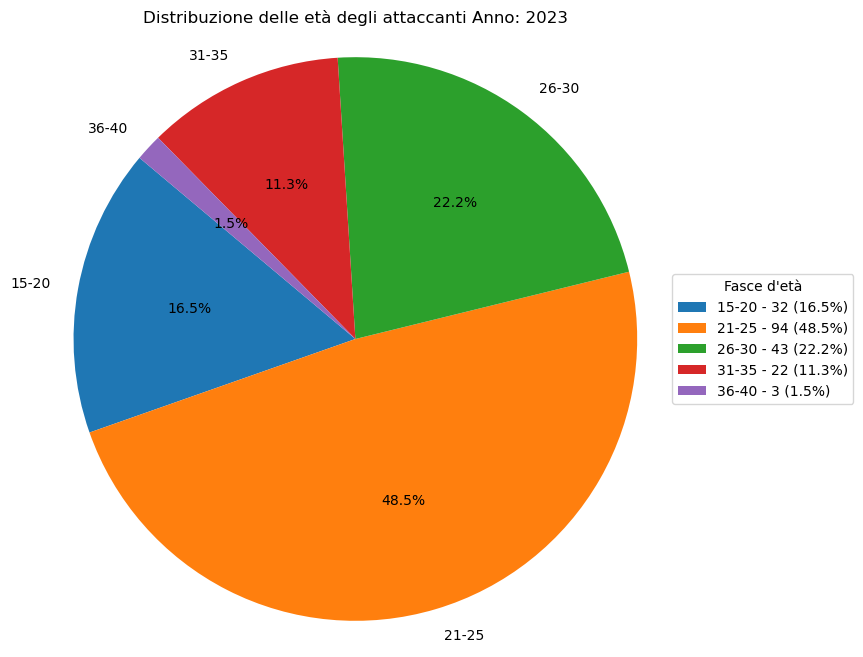

La media dell'età per l'anno 2023 è: 24.75


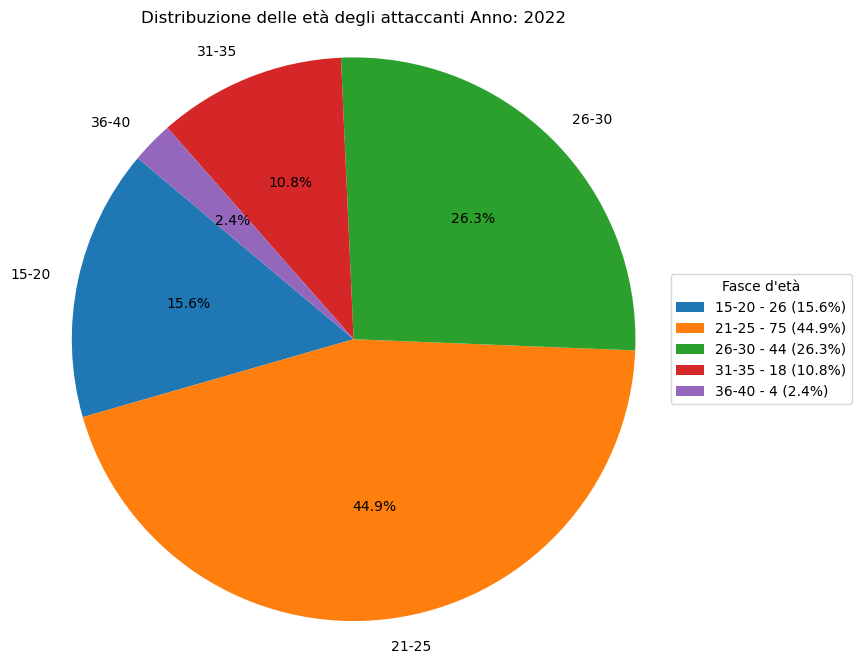

La media dell'età per l'anno 2022 è: 25.01


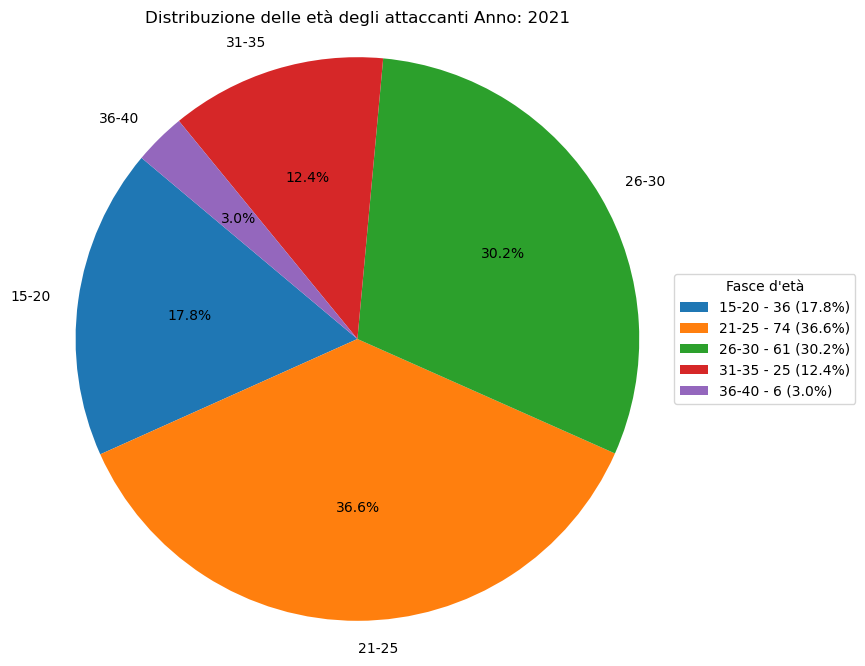

La media dell'età per l'anno 2021 è: 25.18


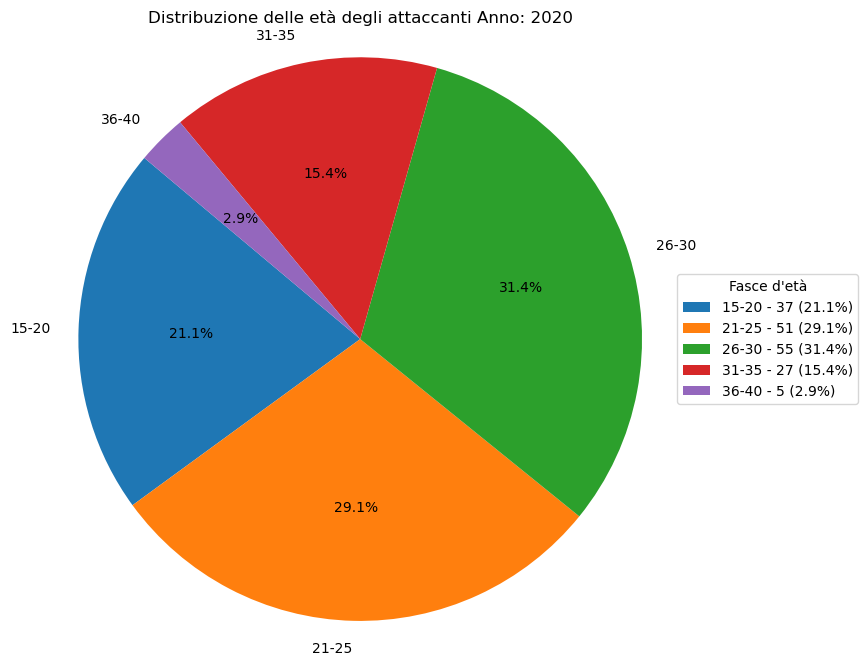

La media dell'età per l'anno 2020 è: 25.52


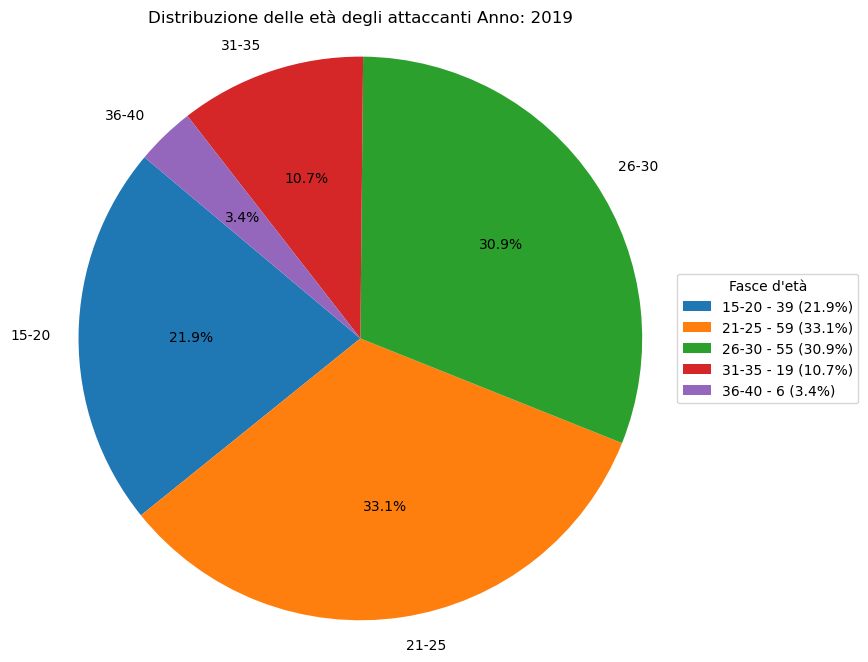

La media dell'età per l'anno 2019 è: 25.04


In [2]:
# Diagrammi a torta

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Ciclo sui file per generare i grafici
for file in files:
    # Leggi i dati da ogni file (si presuppone che ci sia una colonna 'Age')
    data = pd.read_excel(file)
    eta = data['Age']

    # Categorizza le età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

    # Conta il numero di attaccanti in ciascuna fascia
    eta_counts = eta_bins.value_counts().sort_index()

    # Crea una figura e un oggetto ax
    fig, ax = plt.subplots(figsize=(8, 8))

    # Crea il diagramma a torta sull'oggetto ax
    ax.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)

    # Imposta il titolo per ogni anno
    ax.set_title(f"Distribuzione delle età degli attaccanti Anno: {year[file]}")

    # Assicura che il grafico sia circolare
    ax.axis('equal')

    # Aggiungi la legenda con i valori percentuali
    ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, 
               pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())],
              title="Fasce d'età", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostra il diagramma a torta
    plt.show()
    
    # Calcola e stampa la media dell'età
    media_eta = eta.mean()
    print(f"La media dell'età per l'anno {year[file]} è: {media_eta:.2f}")


Dai grafici possiamo notare che la media delle età è andata calando con gli anni, evidentemente l'idea delle squadre è quello di comprare attaccanti più giovani oppure investire nel reparto giovanile, migliorare il vivaio e promuovere gli attaccanti direttamente dalla Primavera (squadra U19).

Passiamo ora all'analisi delle nazionalità. Vediamo quali sono le nazionalità più presenti in Serie A.

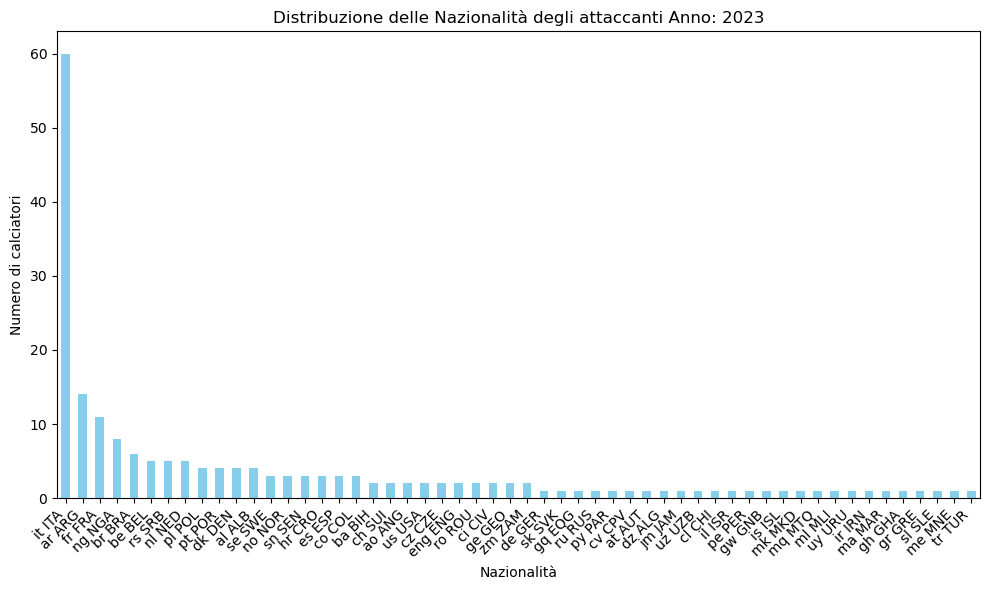

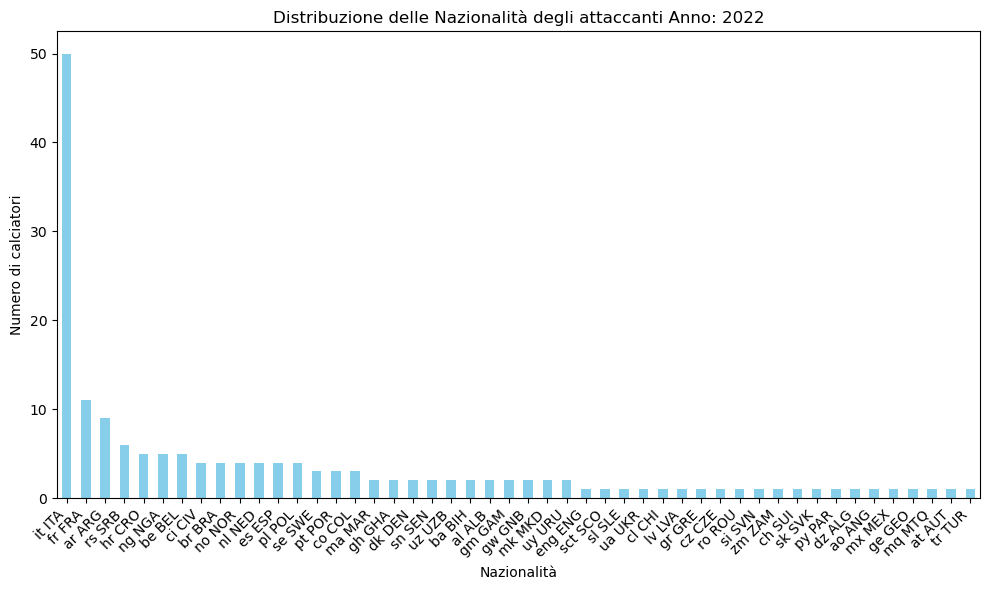

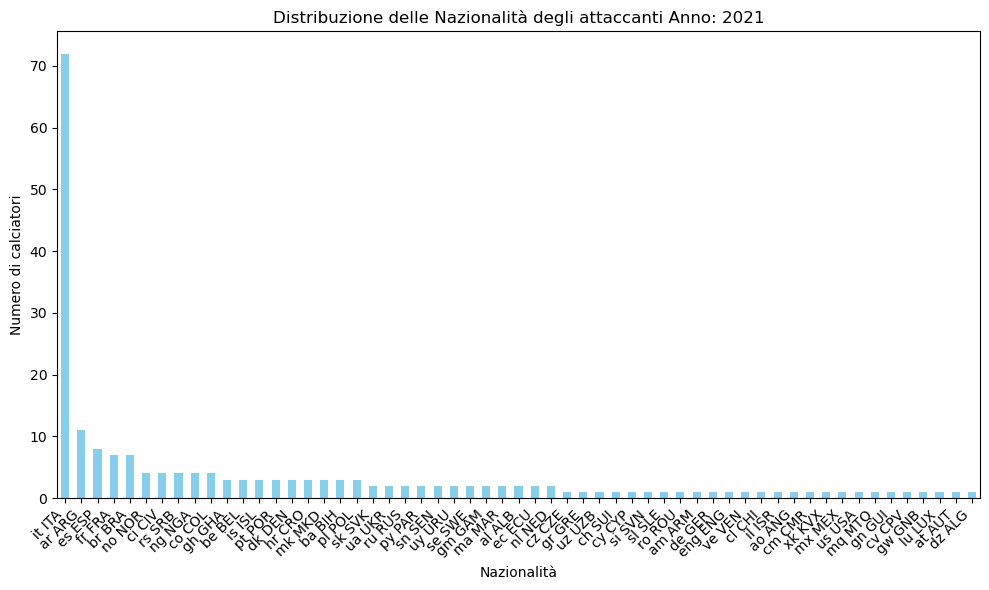

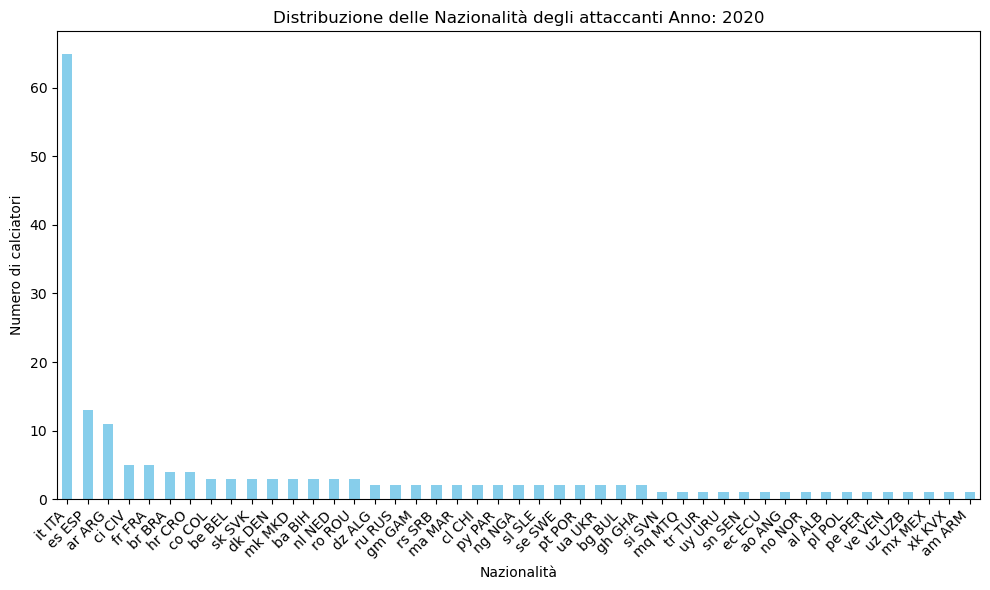

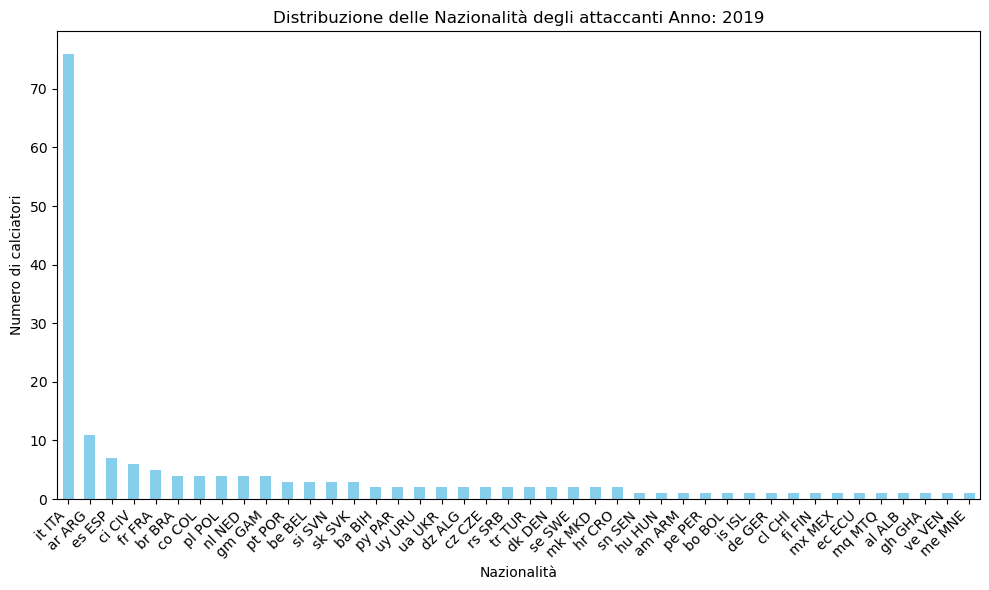

In [3]:
# Ciclo sui file per generare i grafici
for file in files:

    data = pd.read_excel(file)
     
    nazionalita = data['Nation']   #istogramma nazionalità

    # Conta il numero di calciatori per ciascuna nazionalità
    nazionalita_counts = nazionalita.value_counts()

    # Crea l'istogramma
    fig, ax = plt.subplots(figsize=(10, 6))
    nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Aggiungi i titoli e le etichette
    ax.set_title(f'Distribuzione delle Nazionalità degli attaccanti Anno: {year[file]}')
    ax.set_xlabel('Nazionalità')
    ax.set_ylabel('Numero di calciatori')

    # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.xticks(rotation=45, ha='right')

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

Come ci immaginavamo la nazionale più presente, per distacco, è l'Italia. Risultano infatti circa 60 nel 2023, circa 50 nel 2022 (il minimo registrato), circa 70 nel 2021, circa 65 nel 2020 e circa 75 nel 2019 (massimo registrato). Notiamo che oltre all'Italia ci sono anche altre nazioni costantemente molto presenti durante gli anni. Nelle 3 nazioni più presenti è sempre presente l'Argentina con 10 attaccanti circa ogni anno. Se ampliamo il range a 5 notiamo anche la costante presenza di Francia e Spagna che non sono presenti nella top5 solo in un anno, rispettivamente nel 2021 e nel 2023. Fra le altre, le nazioni che meritano una menzione sono sicuramente la Costa d'Avorio presente nel 2019-2020 nella top5 ed il Brasile che solo nel 2022 esce dalla top6.

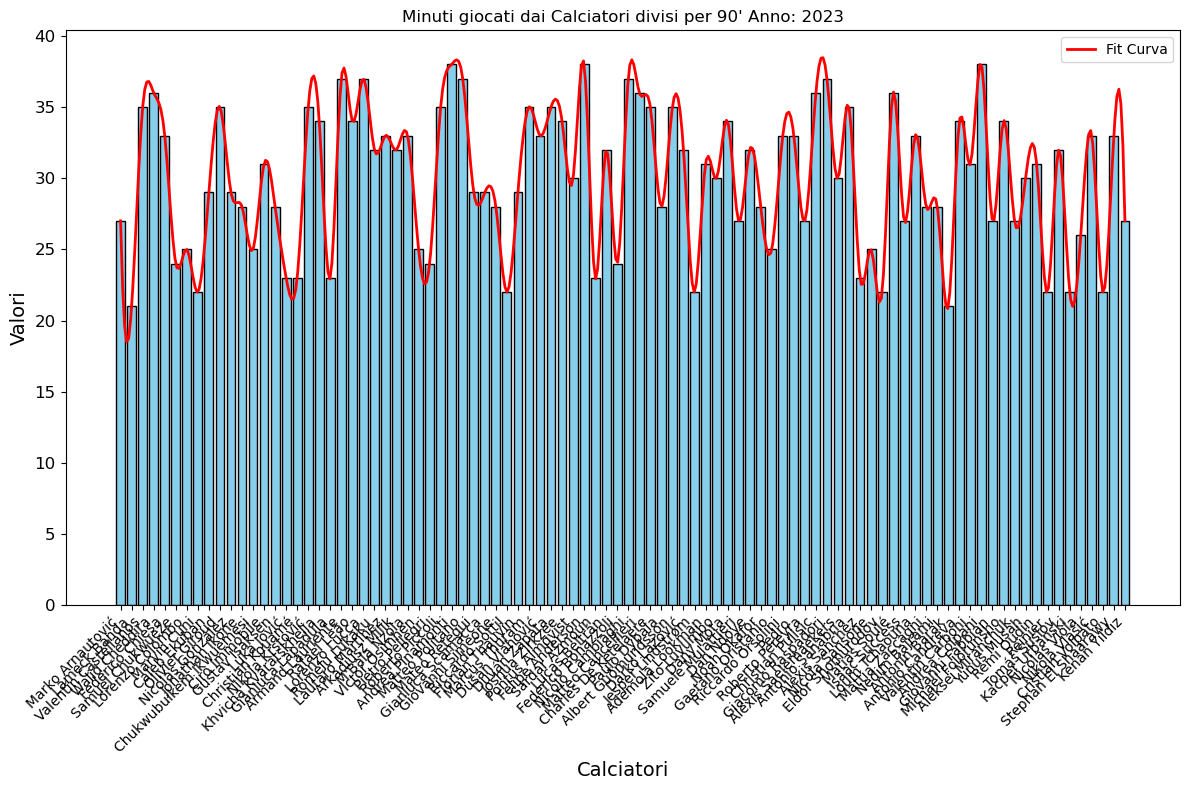

La media per l'Anno 2023 è:29.98913043478261


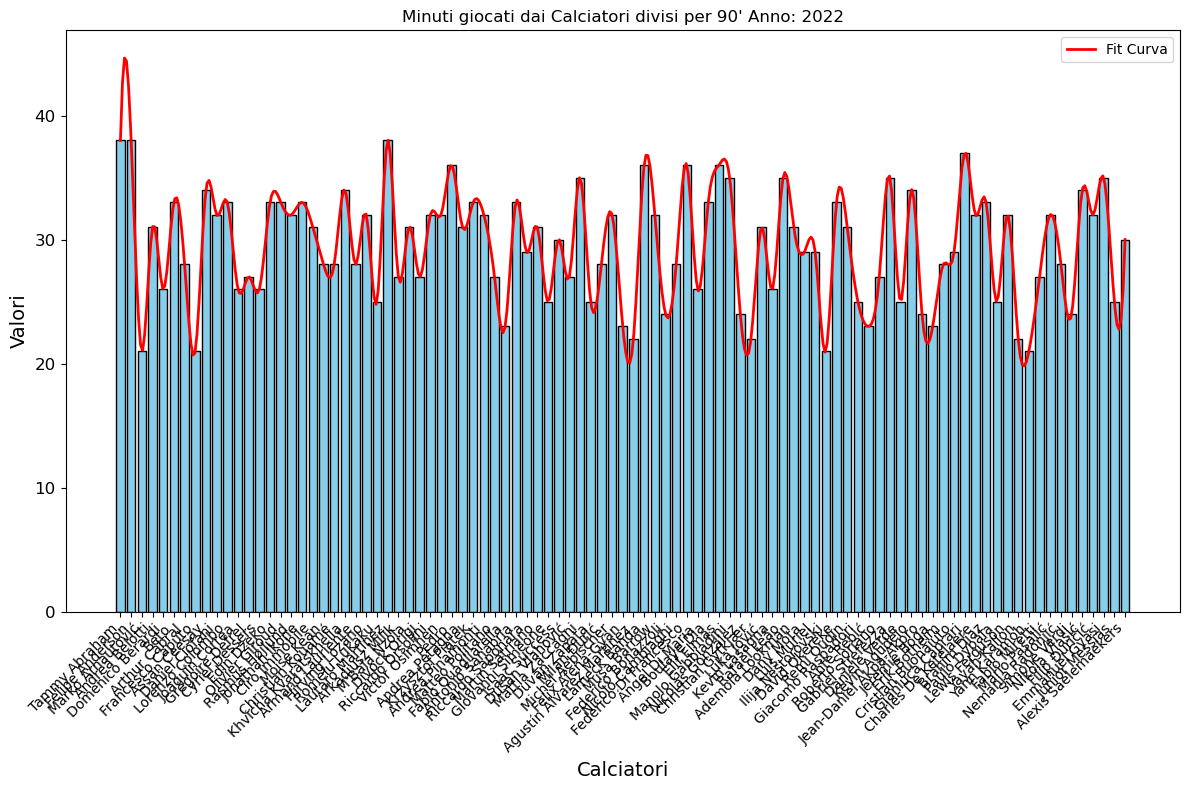

La media per l'Anno 2022 è:29.473684210526315


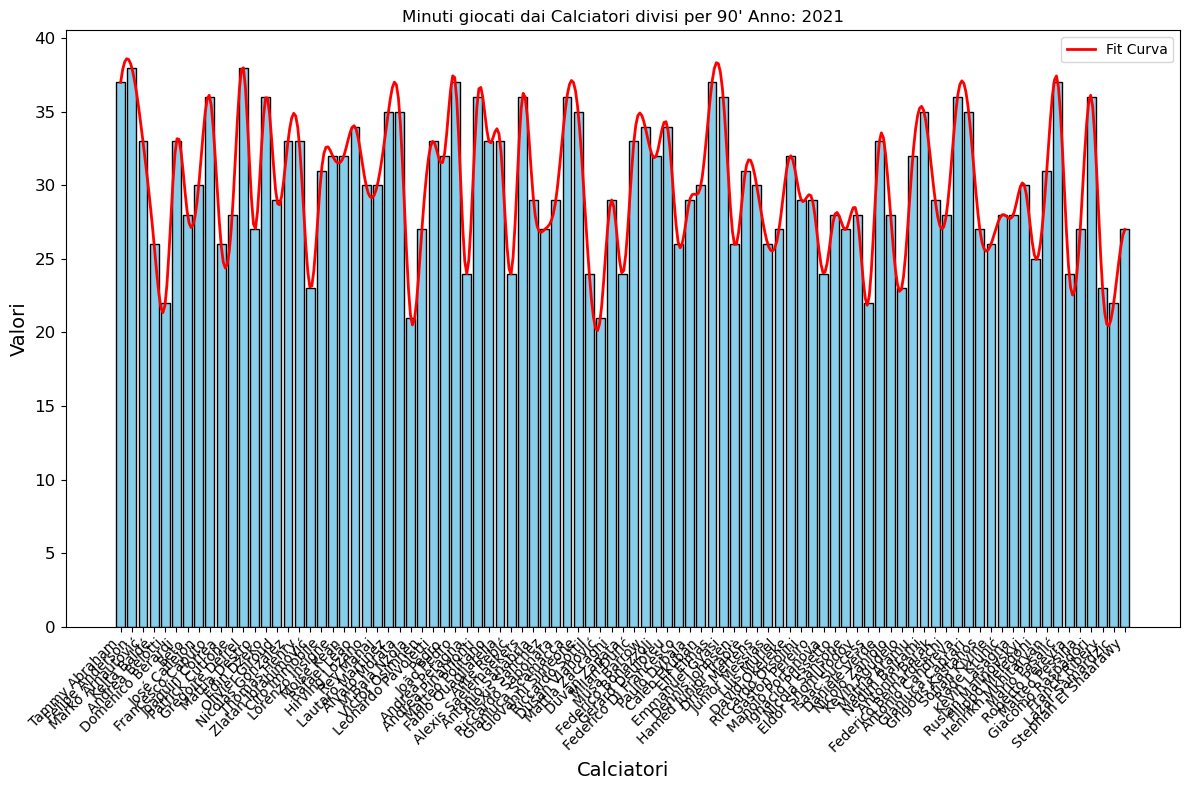

La media per l'Anno 2021 è:29.945054945054945


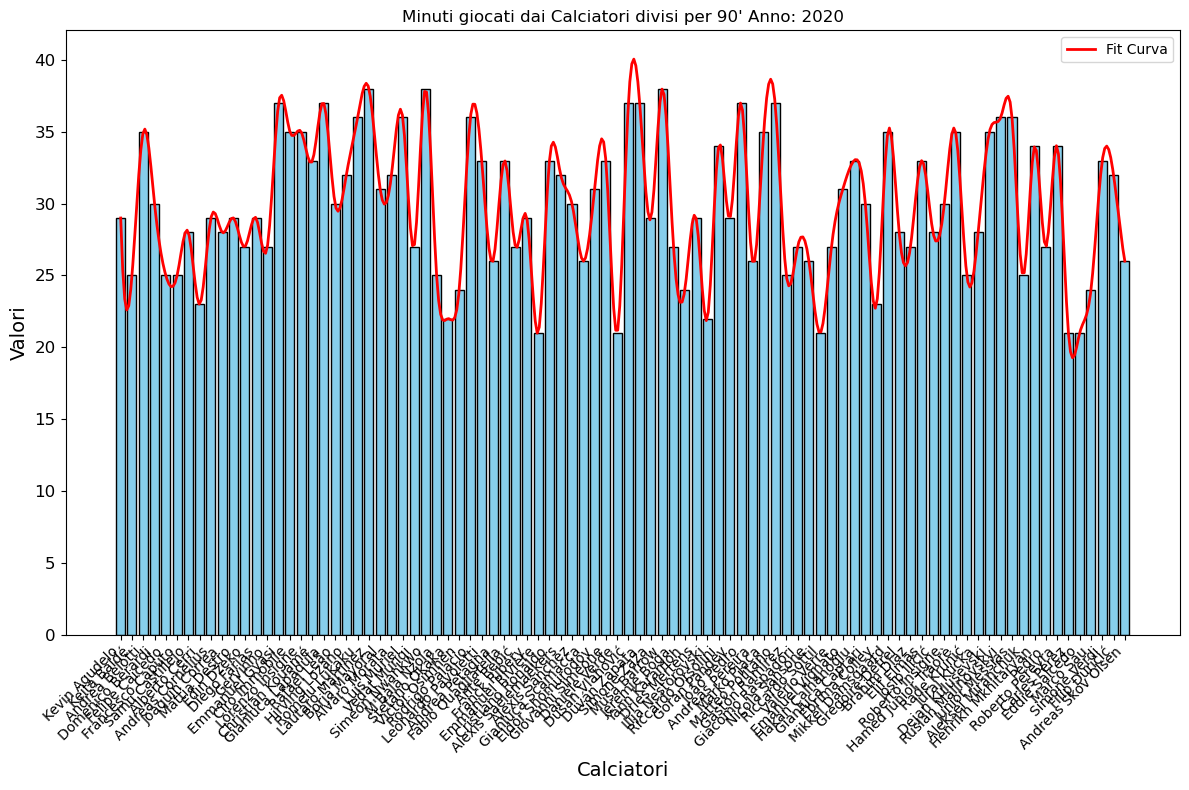

La media per l'Anno 2020 è:29.833333333333332


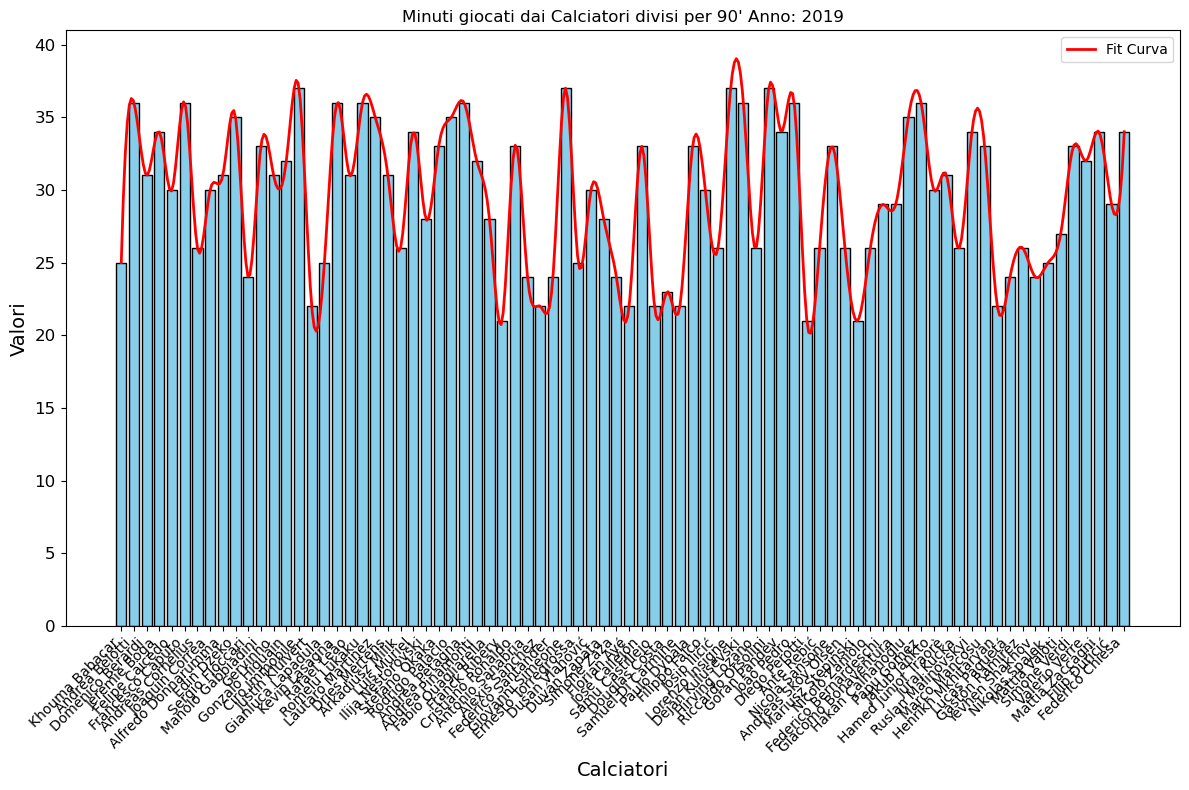

La media per l'Anno 2019 è:29.625


In [4]:
import numpy as np
from scipy.interpolate import make_interp_spline
for file in files:
 data = pd.read_excel(file)

 # Estrai i dati rilevanti (calciatori e valori nella settima colonna)
 calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
 valori = data['MP']      # Settima colonna partendo da sinistra

 filtrato = valori > 20
 calciatori_filtrati = calciatori[filtrato]
 valori_filtrati = valori[filtrato]

 # Crea un istogramma
 plt.figure(figsize=(12, 8))
 plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

 # Ottimizza il layout
 plt.xlabel('Calciatori', fontsize=14)
 plt.ylabel('Valori', fontsize=14)
 plt.title(f"Minuti giocati dai Calciatori divisi per 90' Anno: {year[file]}")
 plt.xticks(rotation=45, ha='right', fontsize=10)
 plt.yticks(fontsize=12)

 # Aggiungi una curva di fit
 x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
 spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
 x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
 y_smooth = spl(x_smooth)

 plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

 plt.tight_layout()
 plt.legend()
 plt.show()

 media_valori_filtrati = valori_filtrati.mean()

 # Mostra il risultato
 print(f"La media per l'Anno {year[file]} è:{media_valori_filtrati}")

In questi grafici vediamo la distribuzione dei minuti giocati diviso 90 dagli attaccanti. In altre parole calcoliamo quante partite complete vengono giocate dagli attaccanti. Abbiamo messo un bound inferiore di 20 minuti giocati per evitare che i dati vengano sfalsati da giocatori con pochi minuti giocati. Vediamo che la distribuzione e la media rimane più o meno la stessa nel corso degli anni. La media addirittura oscilla fra 29.42 e 29.98.

In [5]:
# Aggiungiamo una cella di codice che stampa gli istogrammi di tutte le statistiche di tutti 5 gli anni. In modo da poterli 
# analizzare singolarmente in seguito, senza appesantire il codice con tutti i grafici.

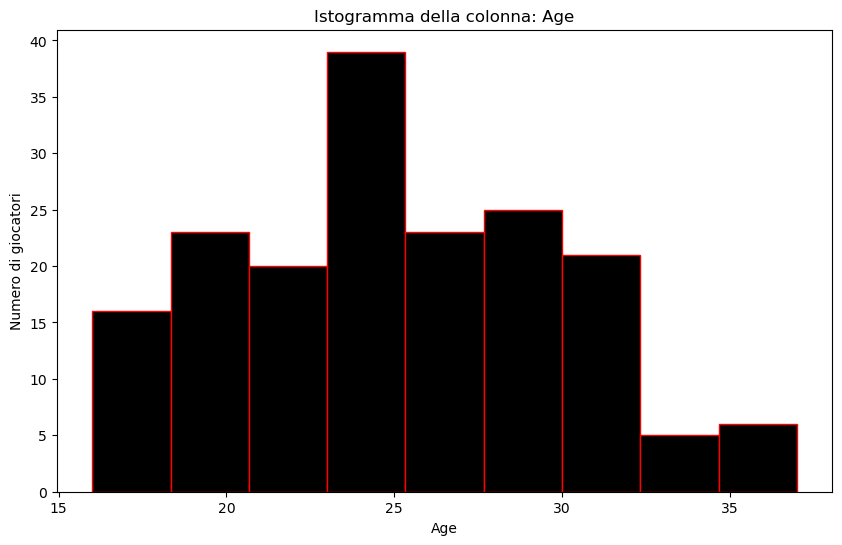

La media di Age per l'anno 2019 è: 25.04


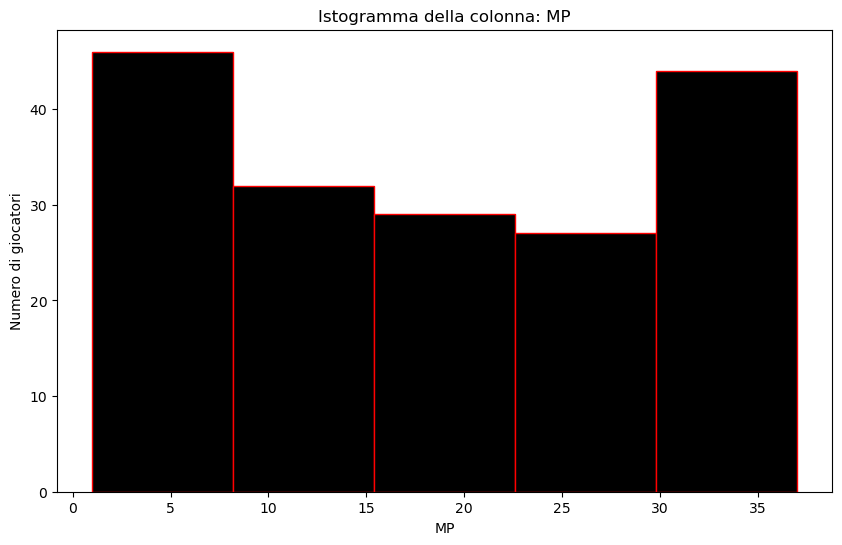

La media di MP per l'anno 2019 è: 18.68


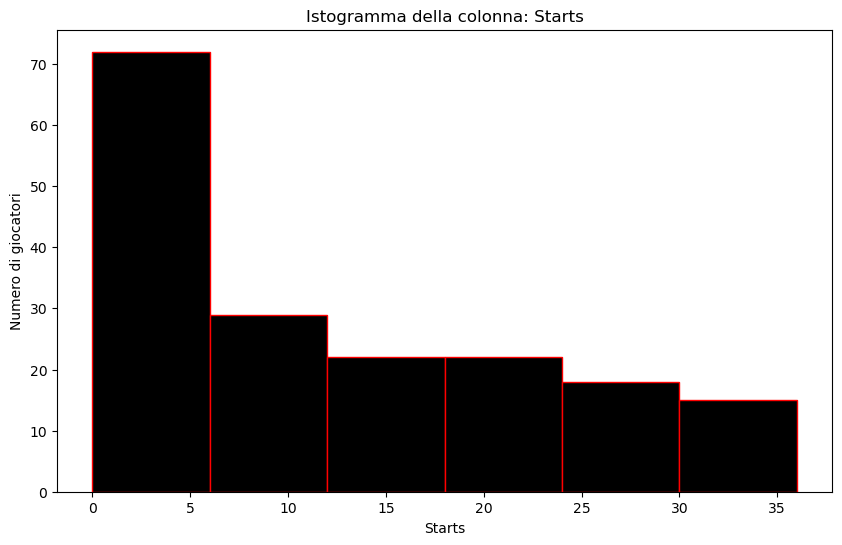

La media di Starts per l'anno 2019 è: 11.79


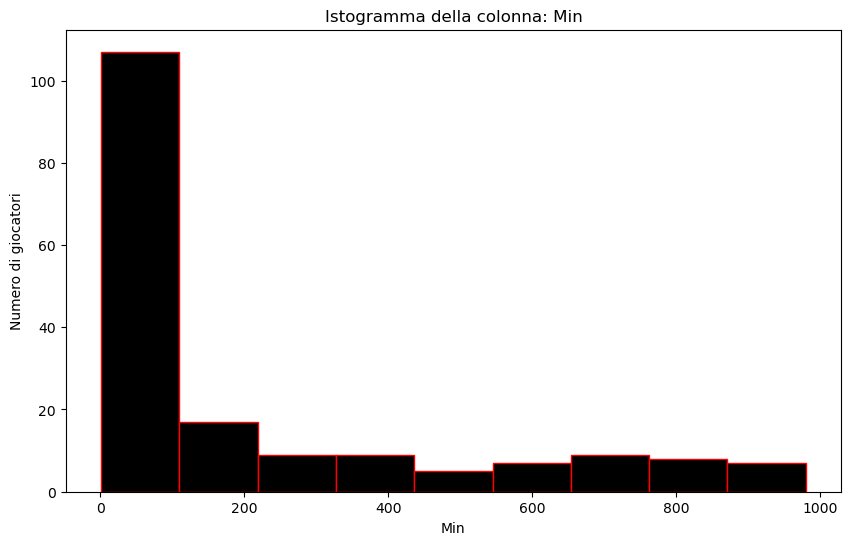

La media di Min per l'anno 2019 è: 201.59


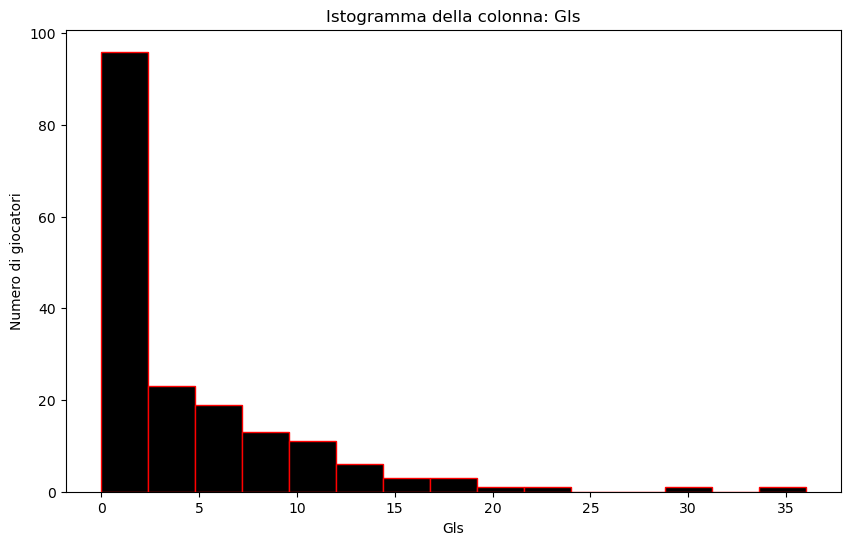

La media di Gls per l'anno 2019 è: 4.31


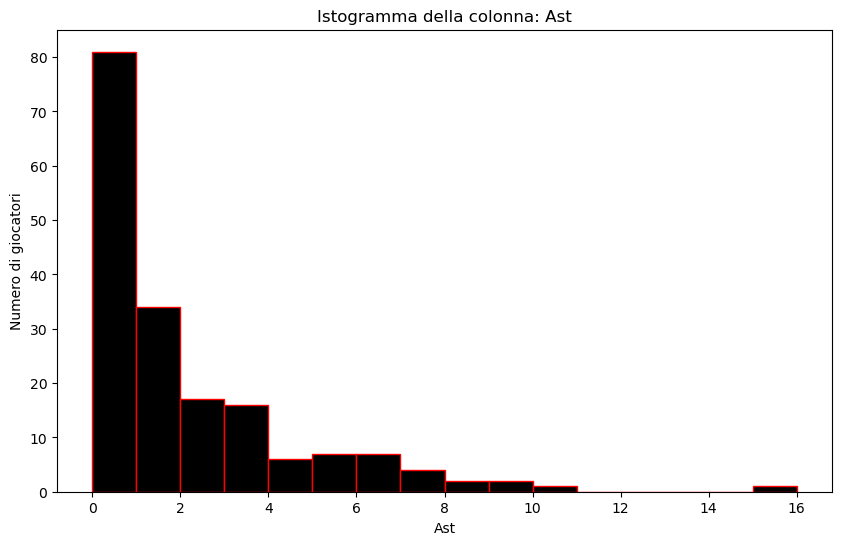

La media di Ast per l'anno 2019 è: 1.71


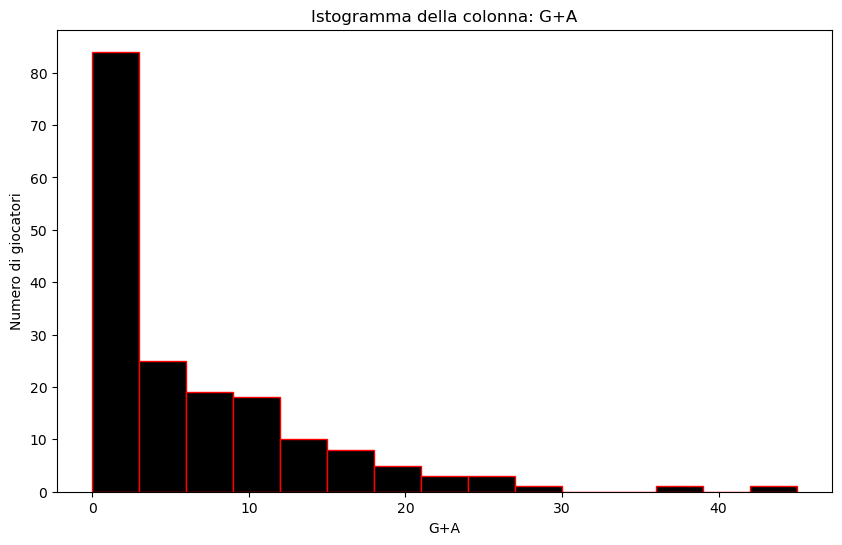

La media di G+A per l'anno 2019 è: 6.03


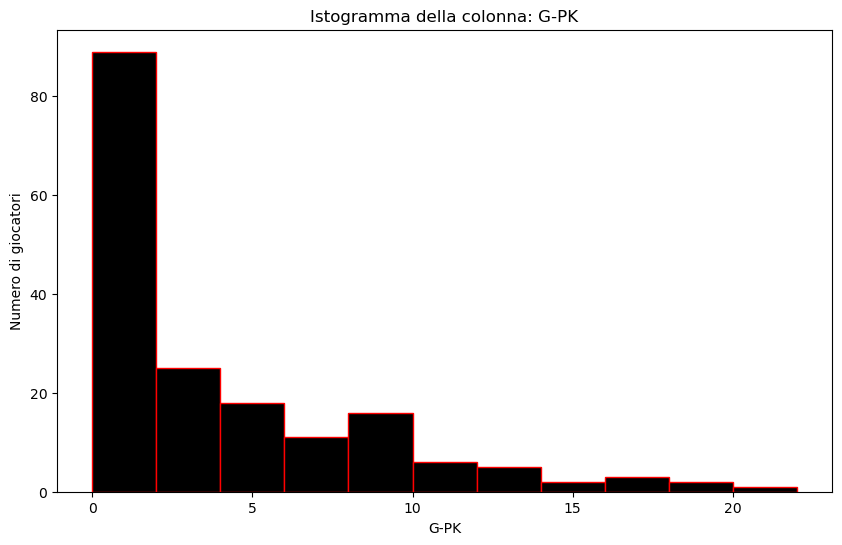

La media di G-PK per l'anno 2019 è: 3.62


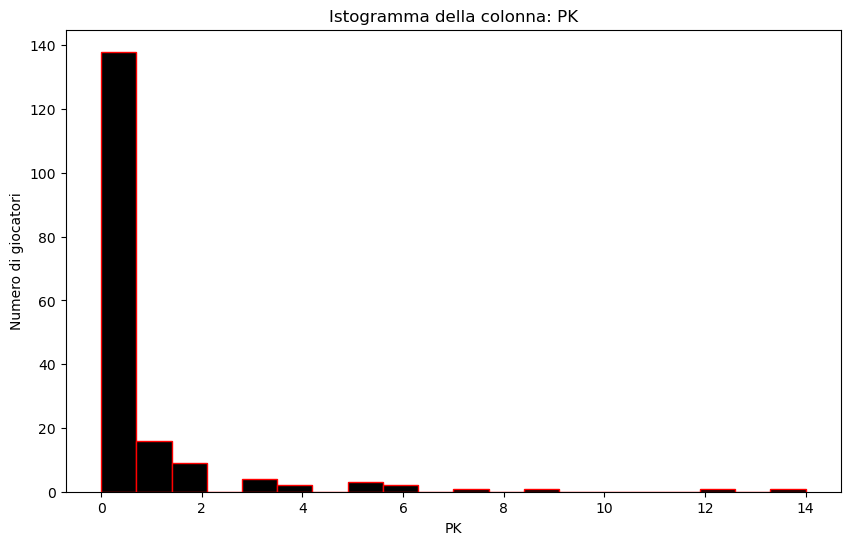

La media di PK per l'anno 2019 è: 0.69


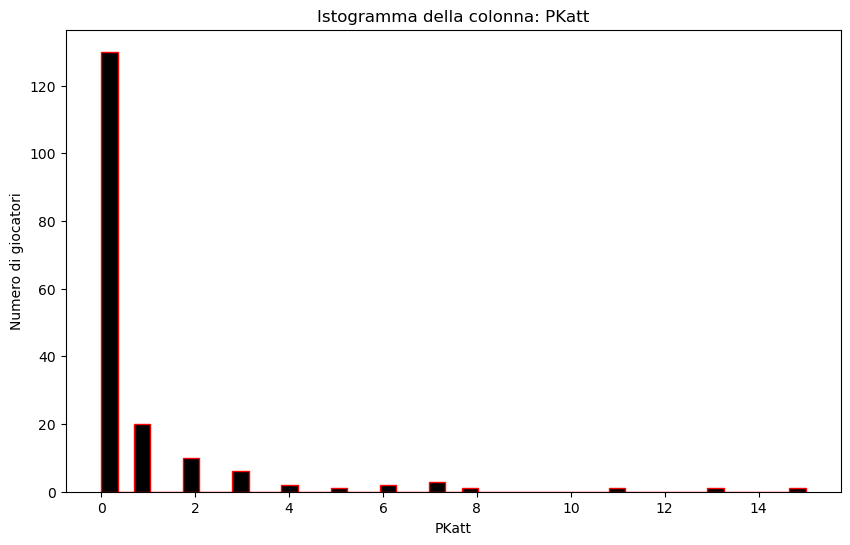

La media di PKatt per l'anno 2019 è: 0.85


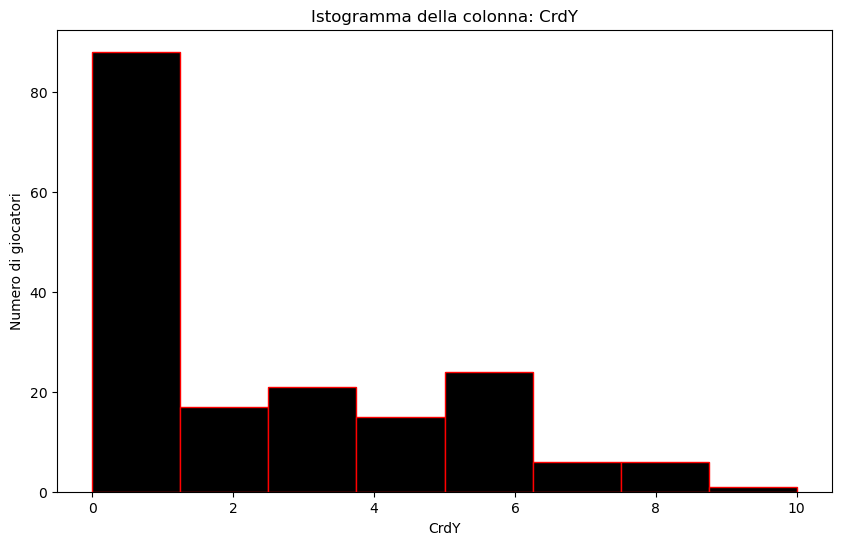

La media di CrdY per l'anno 2019 è: 2.42


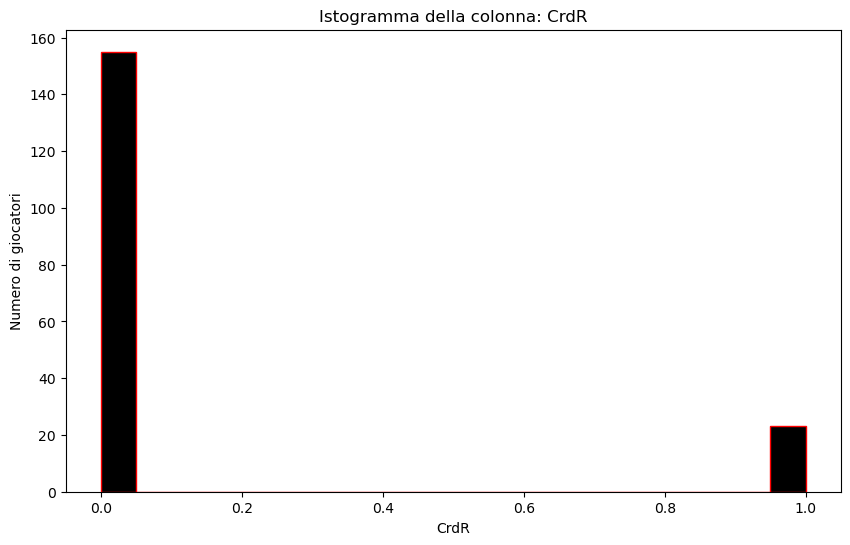

La media di CrdR per l'anno 2019 è: 0.13


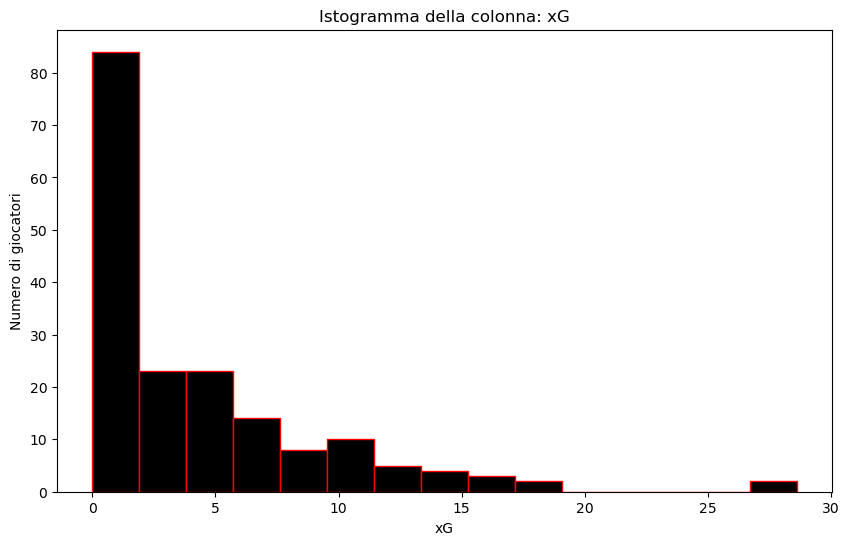

La media di xG per l'anno 2019 è: 4.17


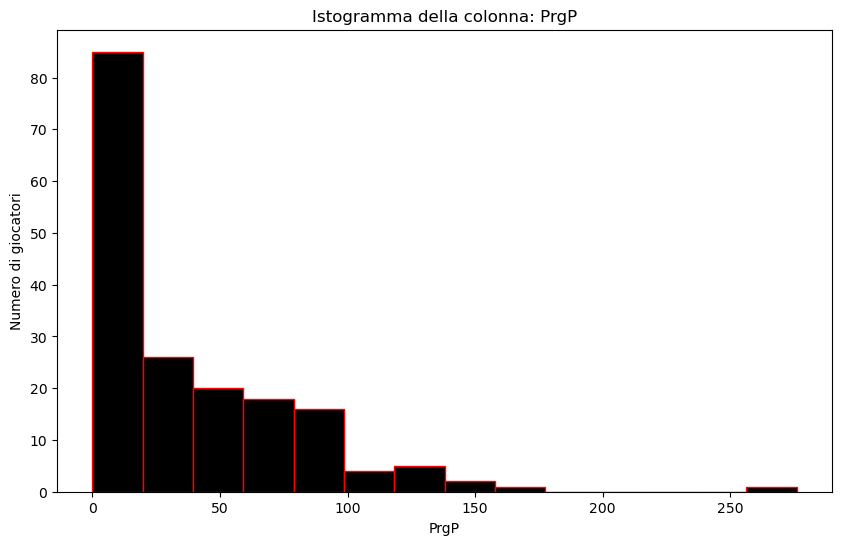

La media di PrgP per l'anno 2019 è: 38.45


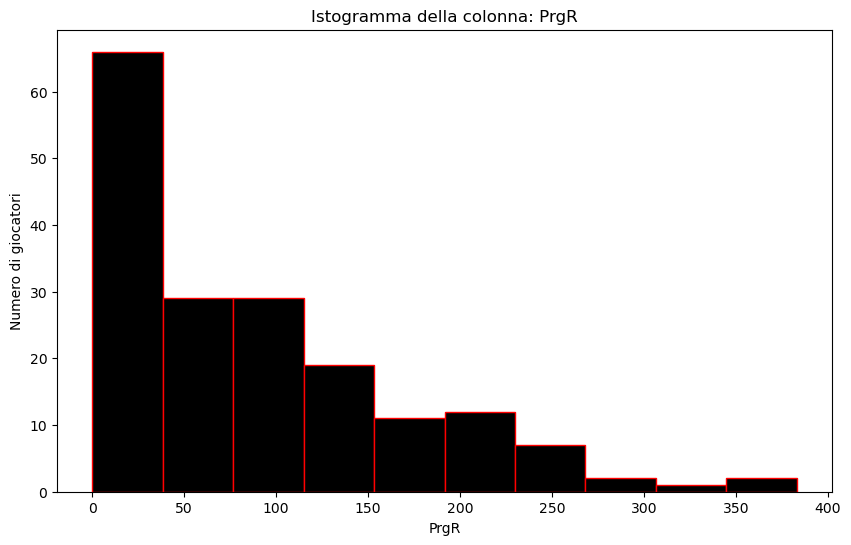

La media di PrgR per l'anno 2019 è: 87.68


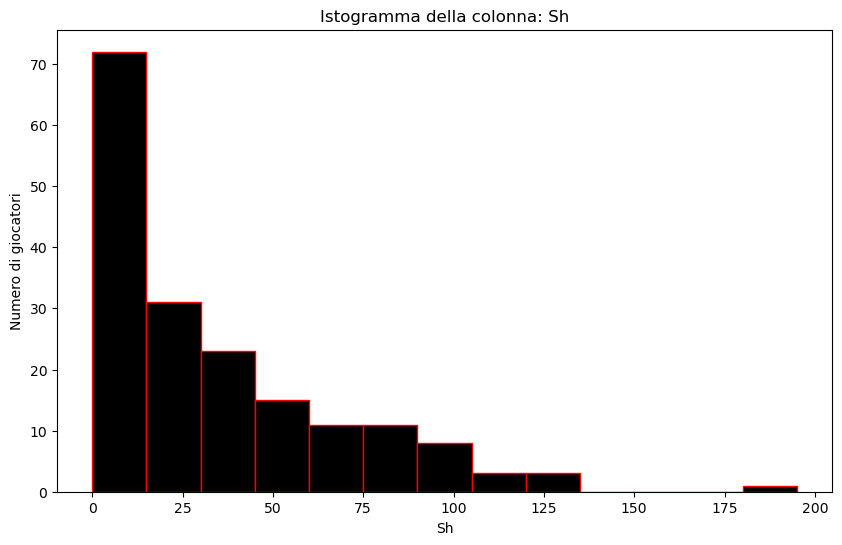

La media di Sh per l'anno 2019 è: 33.49


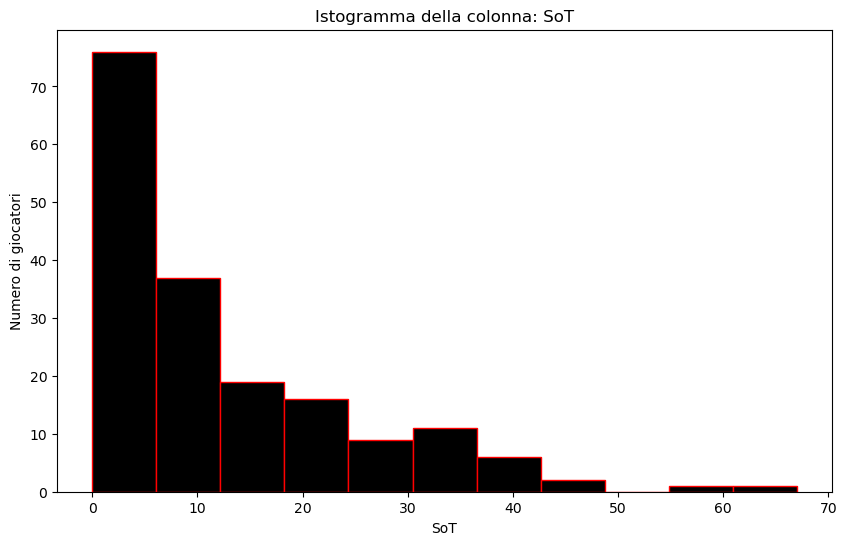

La media di SoT per l'anno 2019 è: 12.13


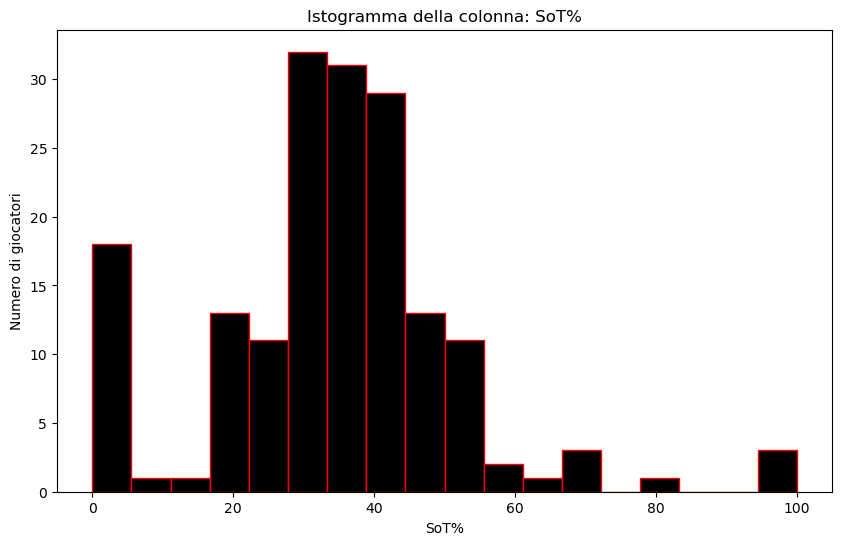

La media di SoT% per l'anno 2019 è: 34.20


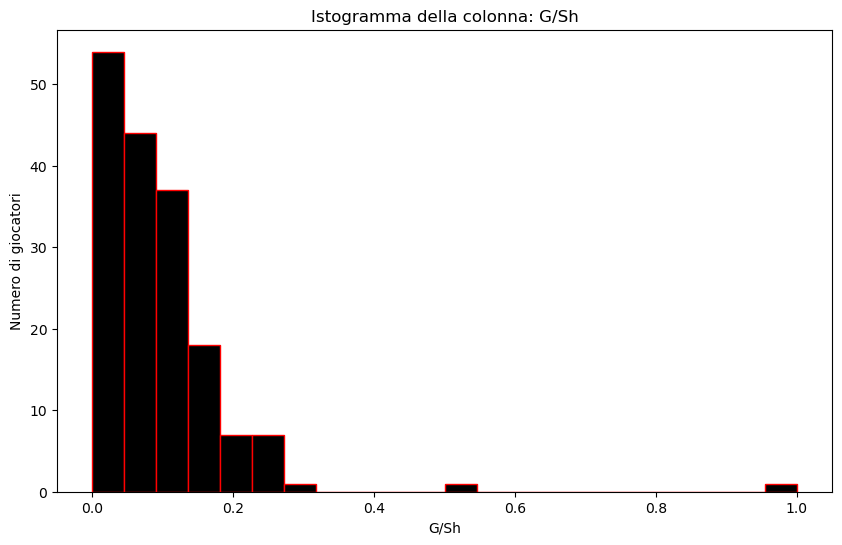

La media di G/Sh per l'anno 2019 è: 0.09


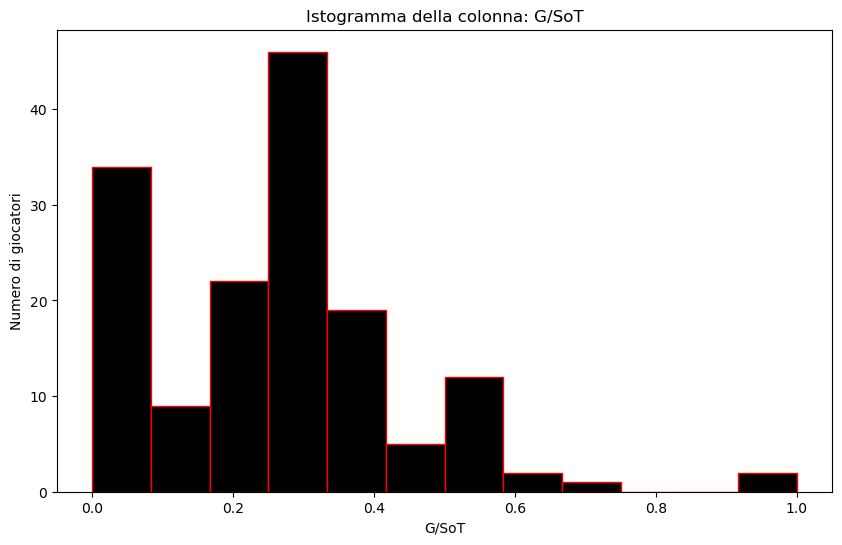

La media di G/SoT per l'anno 2019 è: 0.26


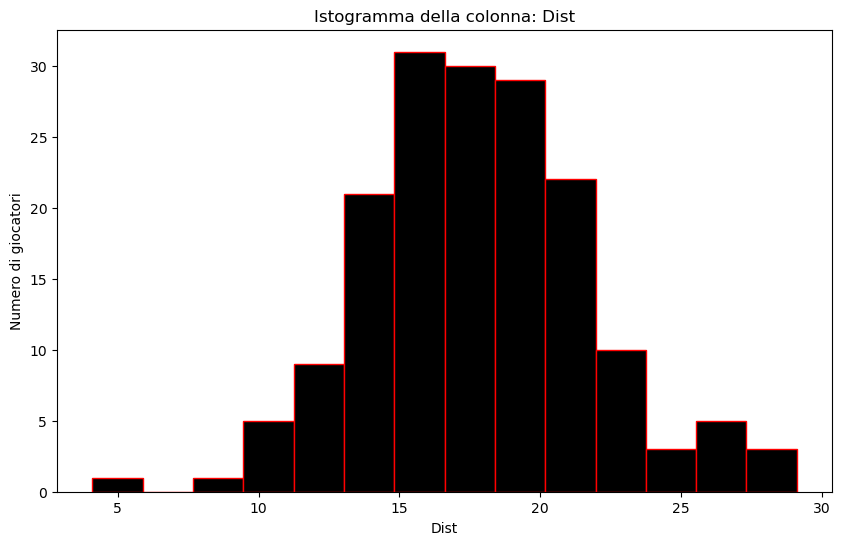

La media di Dist per l'anno 2019 è: 17.80


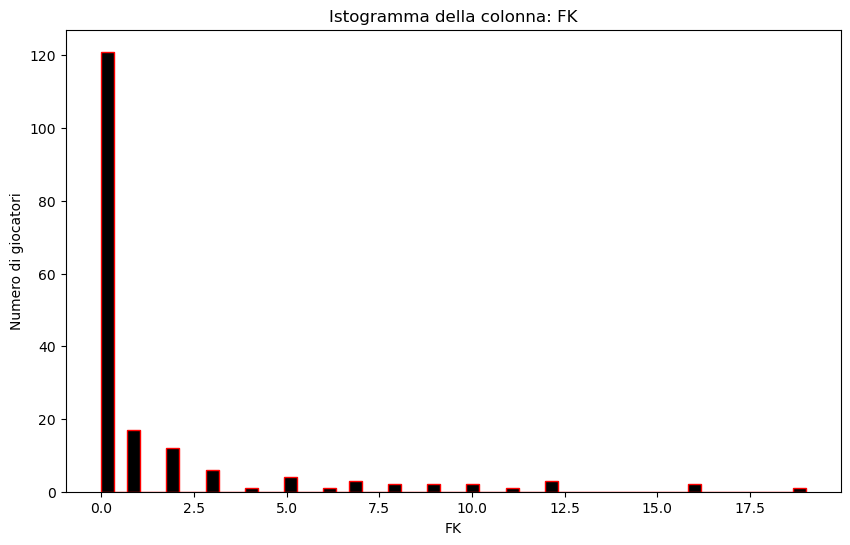

La media di FK per l'anno 2019 è: 1.47


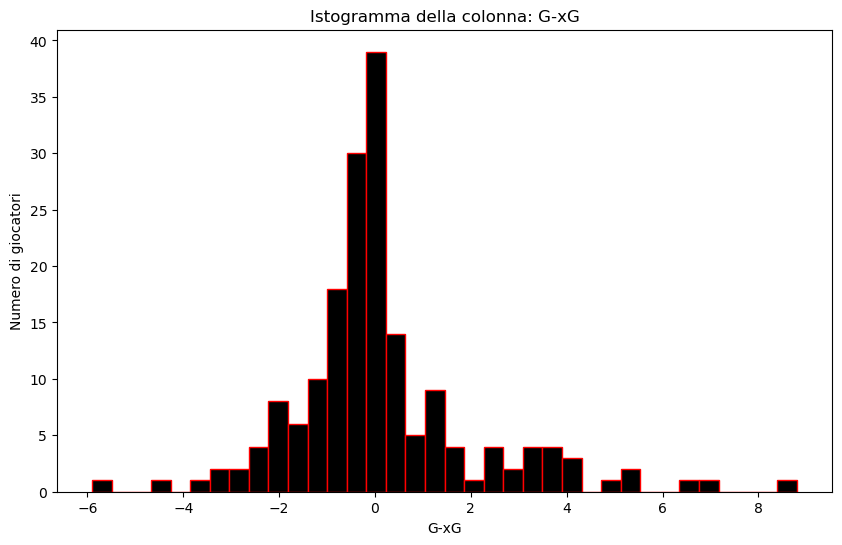

La media di G-xG per l'anno 2019 è: 0.14


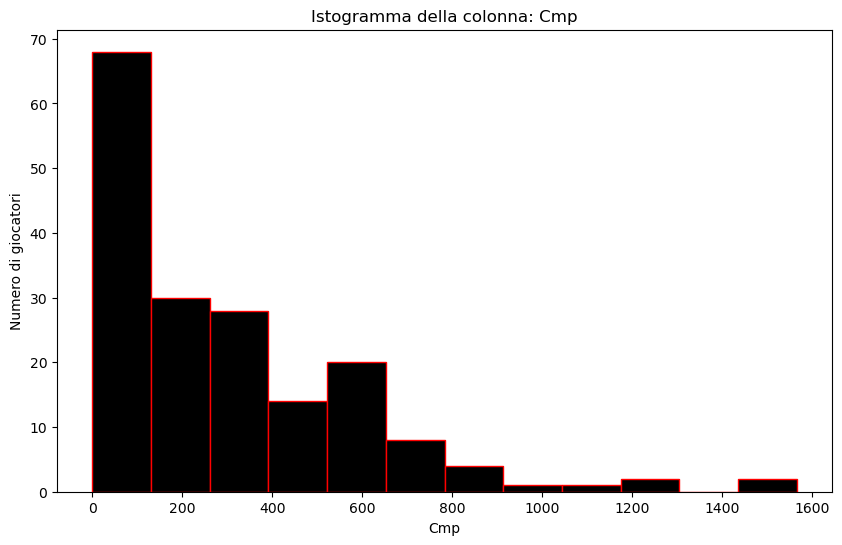

La media di Cmp per l'anno 2019 è: 293.28


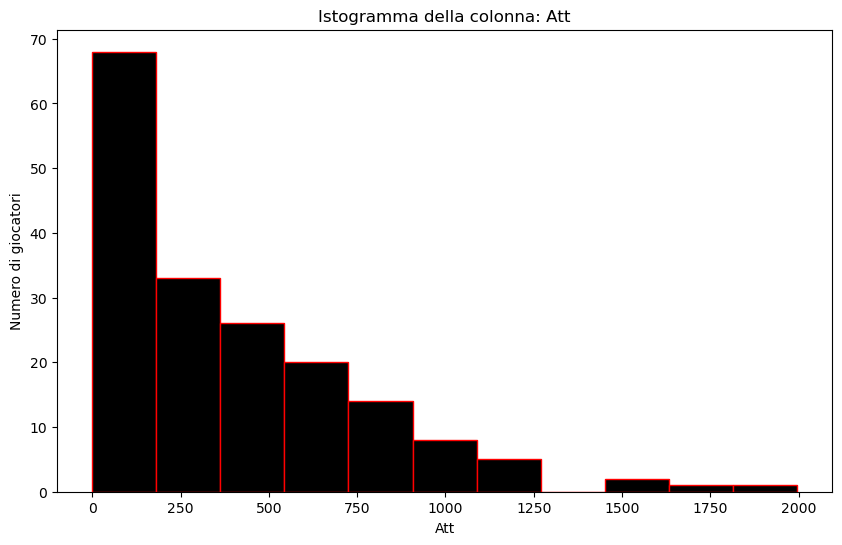

La media di Att per l'anno 2019 è: 392.96


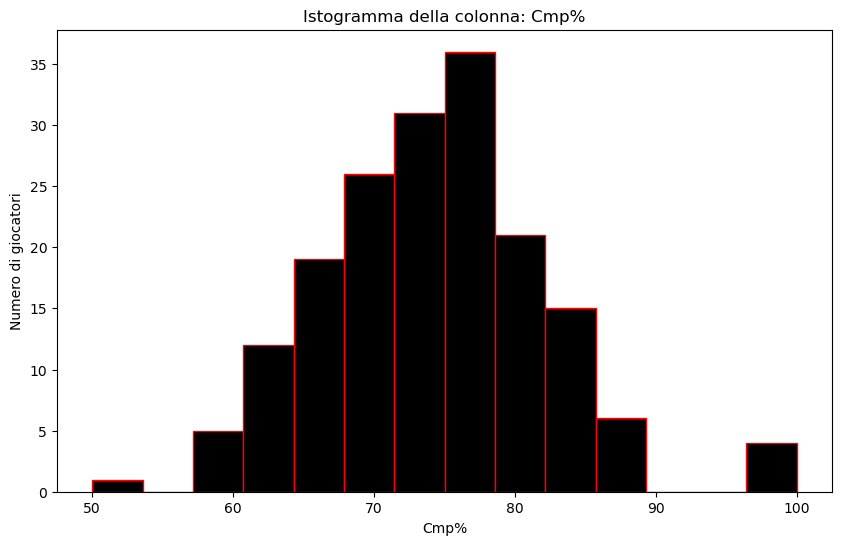

La media di Cmp% per l'anno 2019 è: 74.20


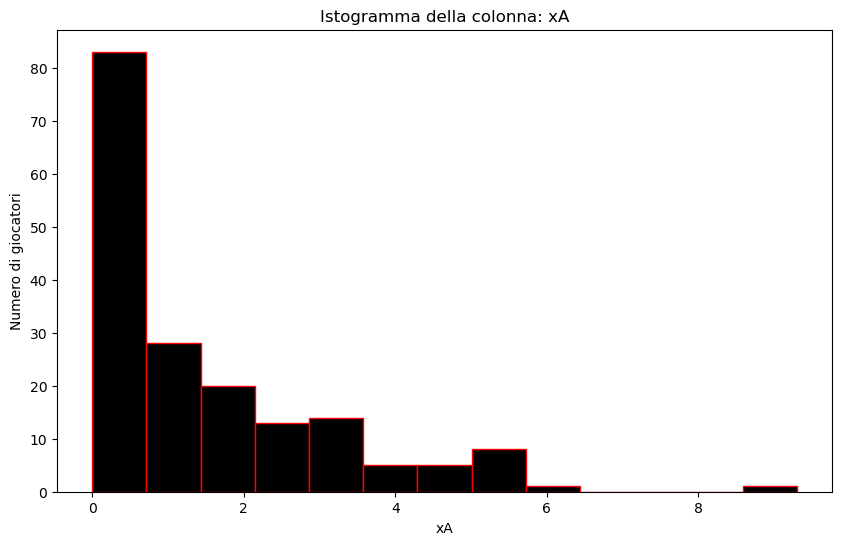

La media di xA per l'anno 2019 è: 1.48


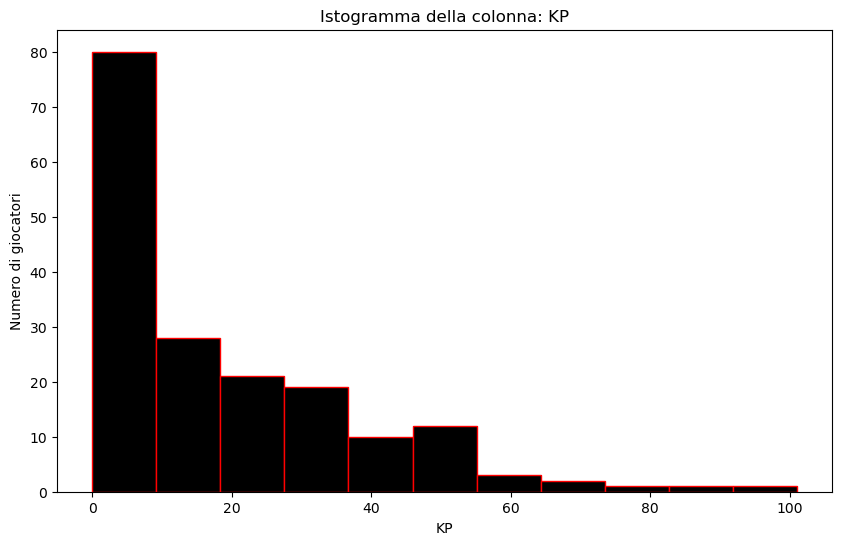

La media di KP per l'anno 2019 è: 18.94


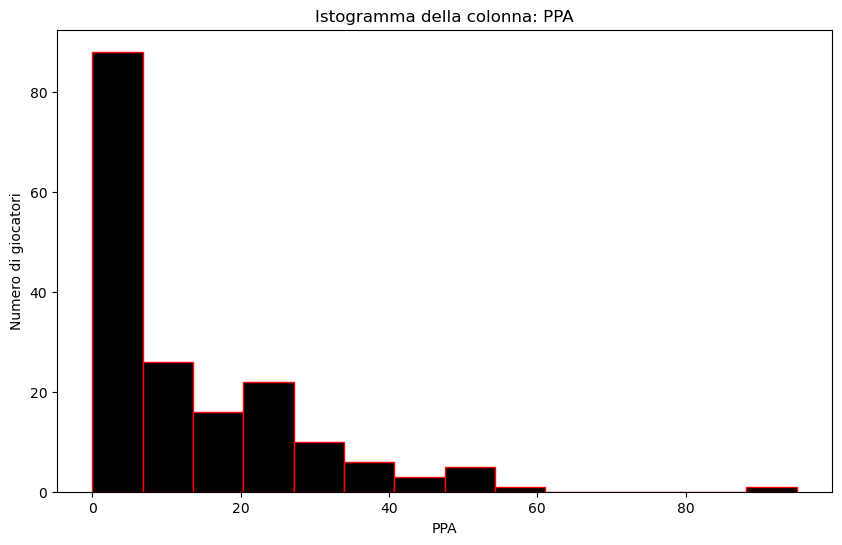

La media di PPA per l'anno 2019 è: 12.87


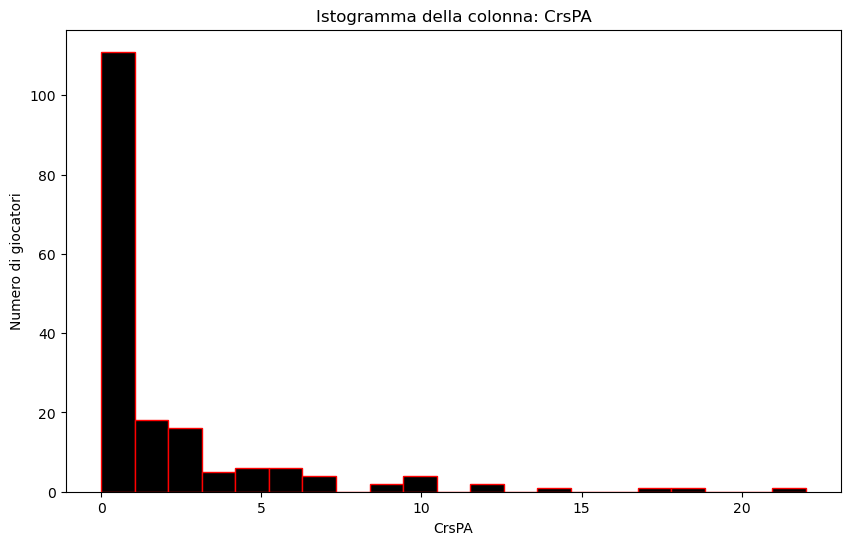

La media di CrsPA per l'anno 2019 è: 2.14


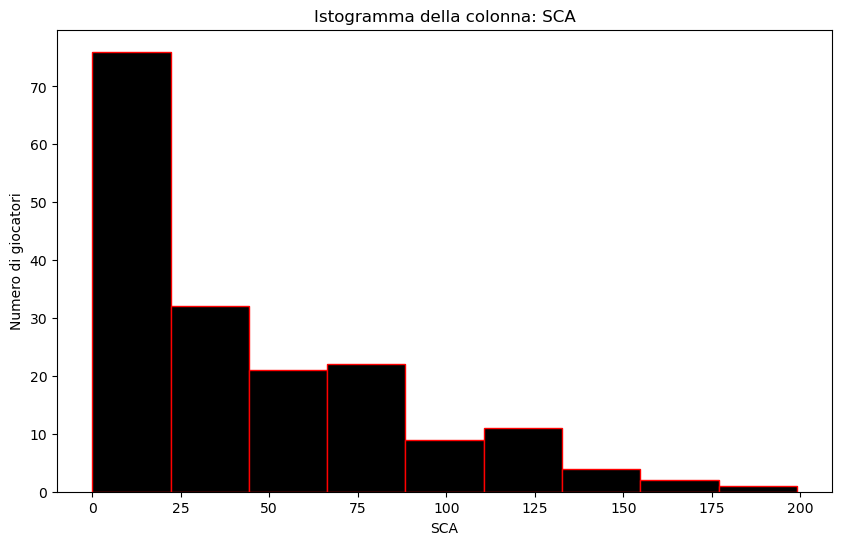

La media di SCA per l'anno 2019 è: 43.78


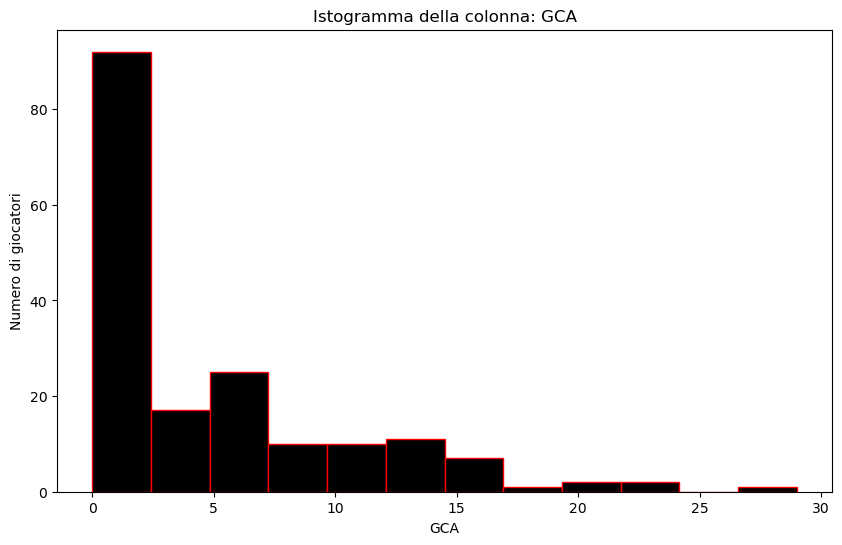

La media di GCA per l'anno 2019 è: 4.83


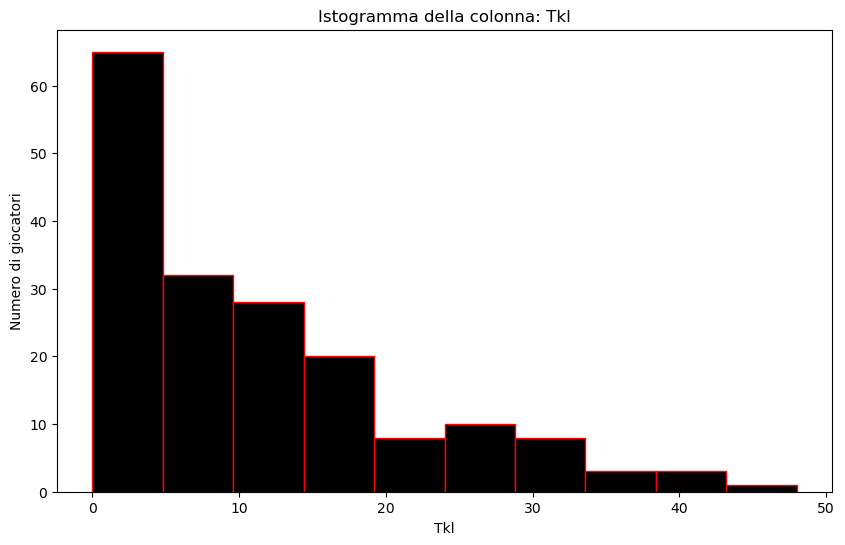

La media di Tkl per l'anno 2019 è: 11.09


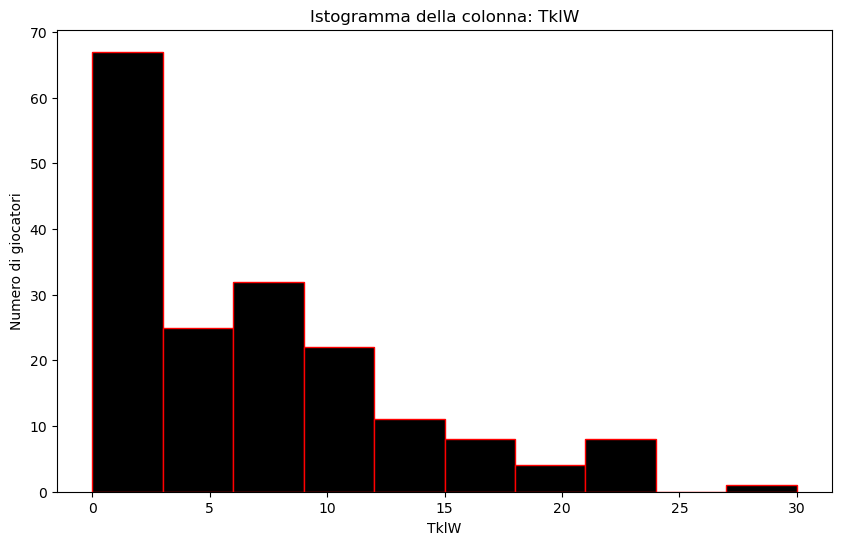

La media di TklW per l'anno 2019 è: 6.47


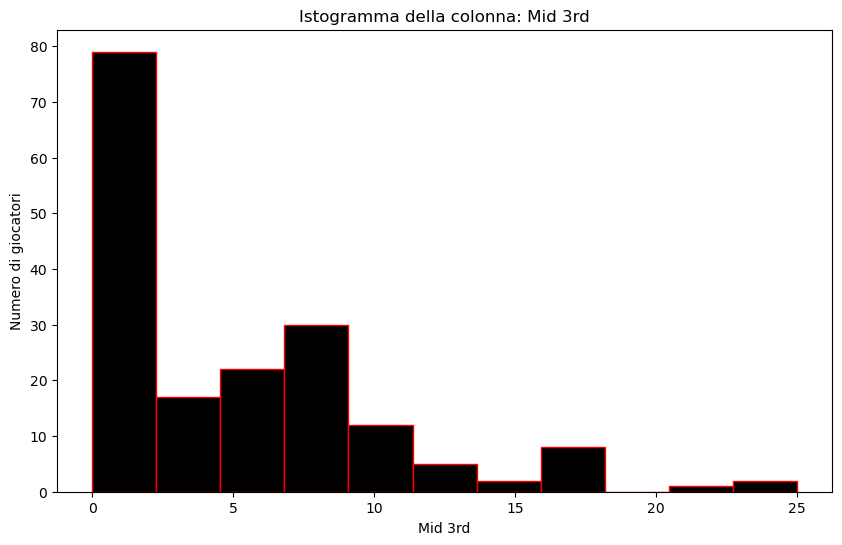

La media di Mid 3rd per l'anno 2019 è: 4.99


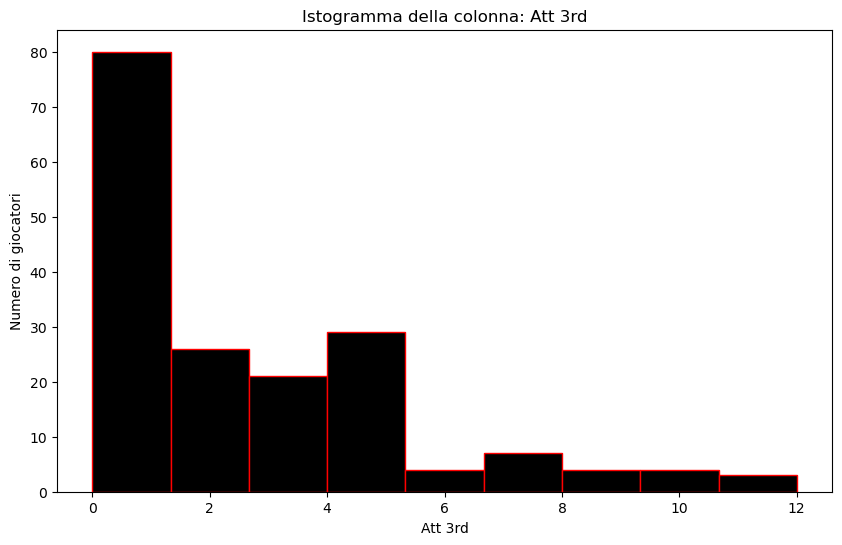

La media di Att 3rd per l'anno 2019 è: 2.58


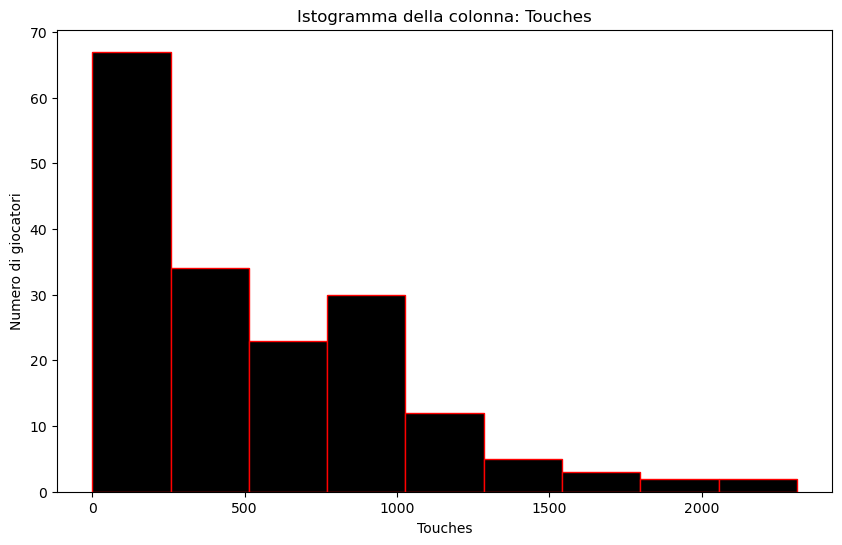

La media di Touches per l'anno 2019 è: 530.88


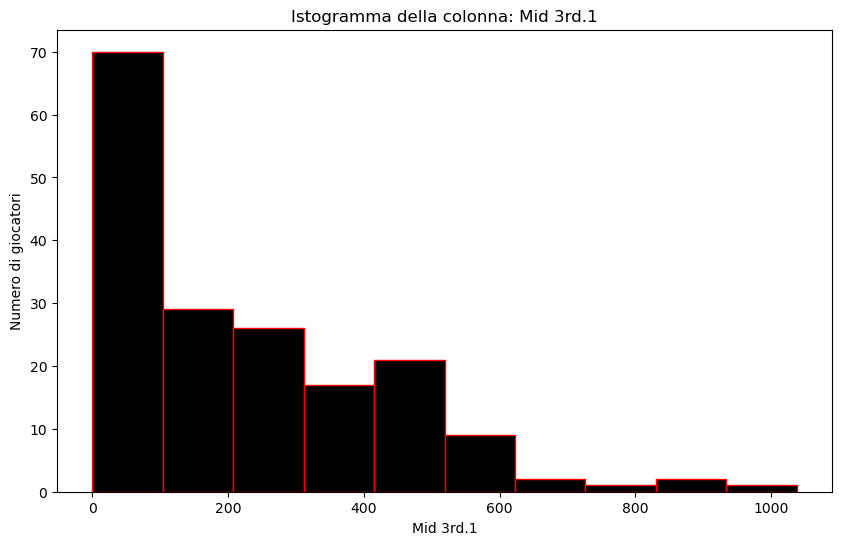

La media di Mid 3rd.1 per l'anno 2019 è: 226.56


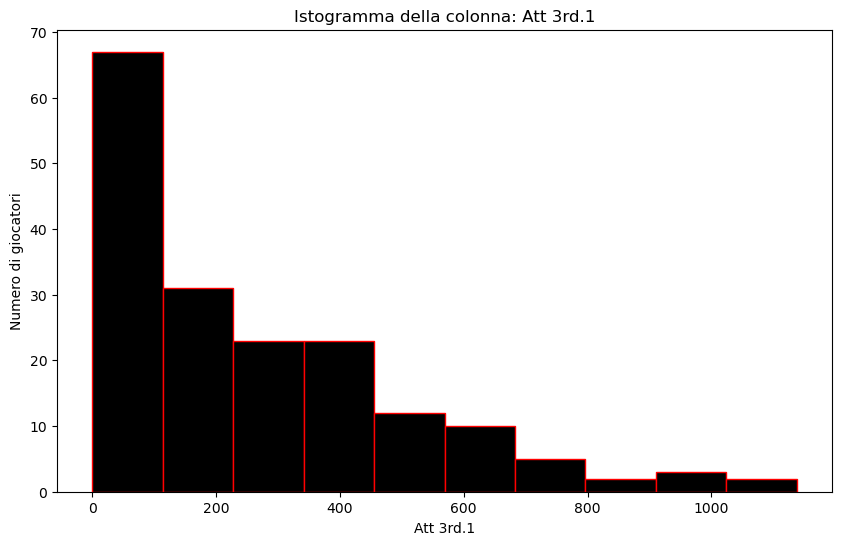

La media di Att 3rd.1 per l'anno 2019 è: 261.31


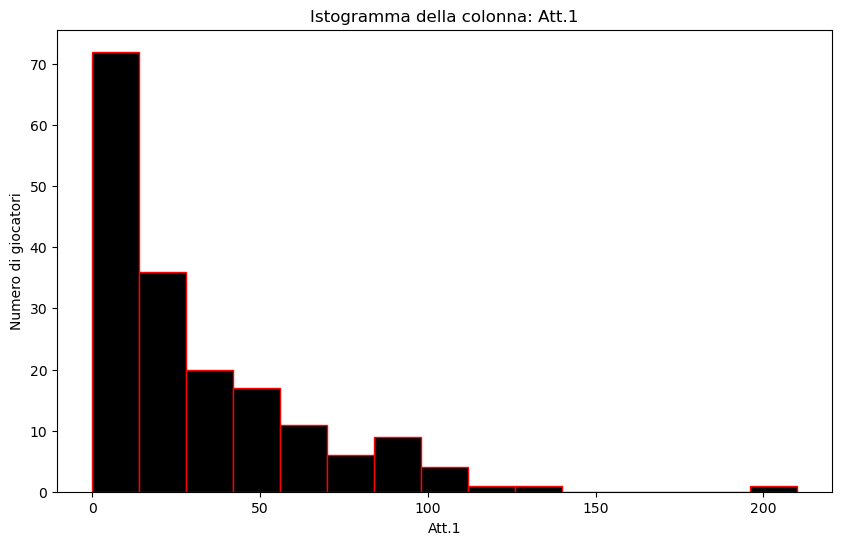

La media di Att.1 per l'anno 2019 è: 29.85


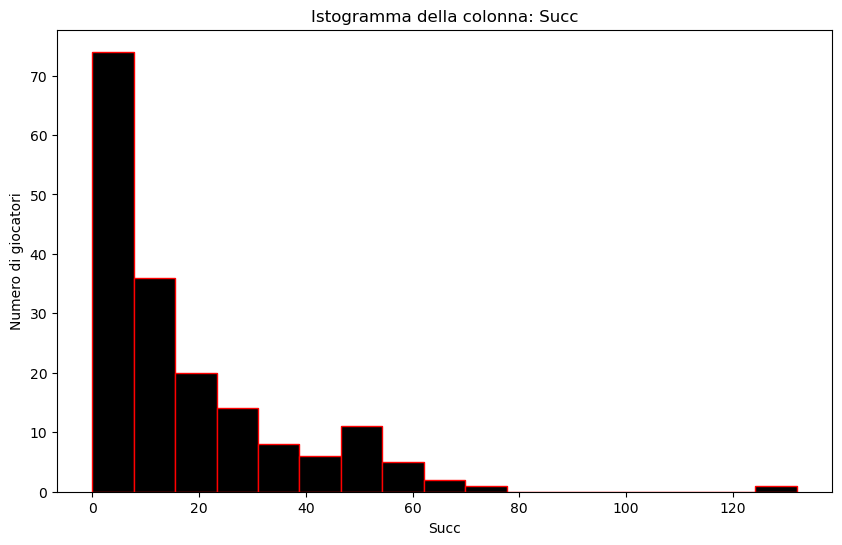

La media di Succ per l'anno 2019 è: 17.22


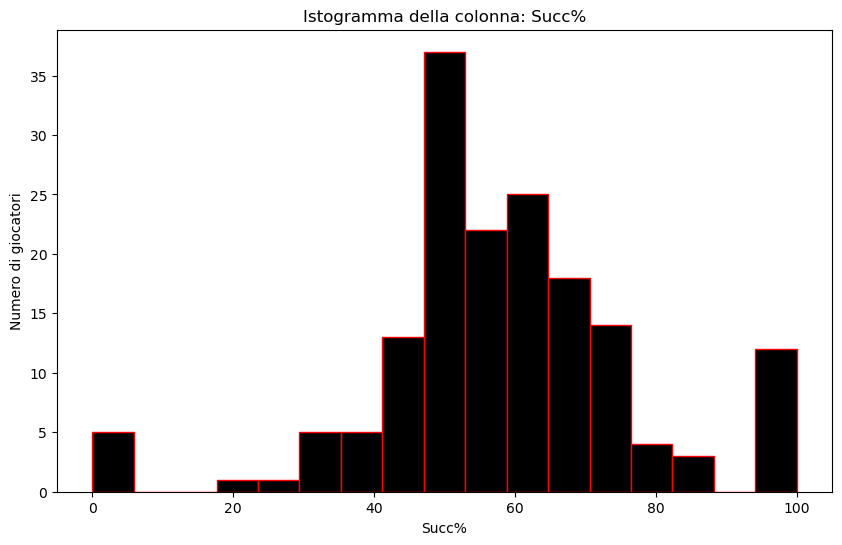

La media di Succ% per l'anno 2019 è: 58.28


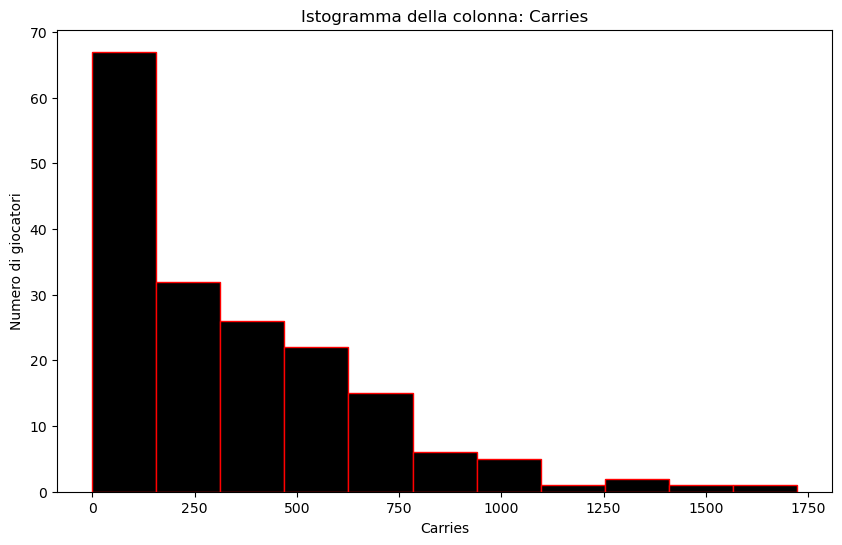

La media di Carries per l'anno 2019 è: 341.90


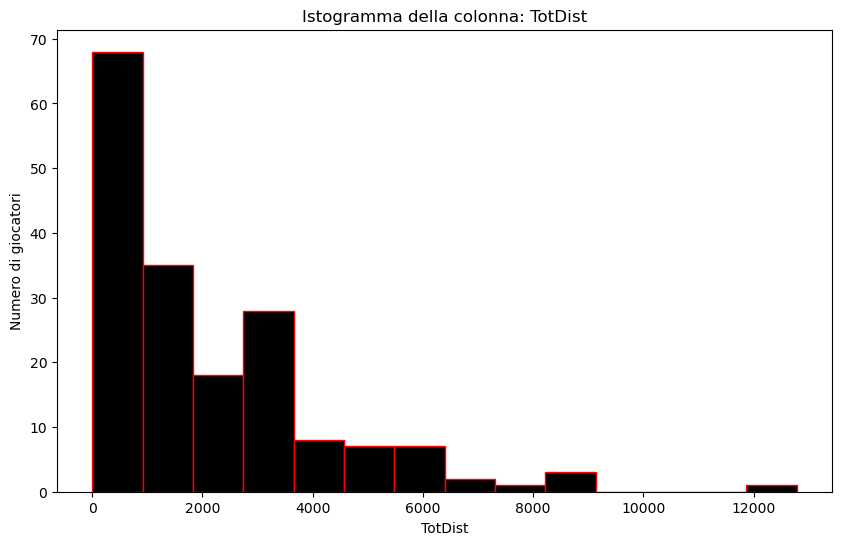

La media di TotDist per l'anno 2019 è: 2057.23


KeyboardInterrupt: 

In [6]:
import scipy.stats as stats
import numpy as np

for file in files:
 data = pd.read_excel(file)

# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=[np.number])

# Funzione per calcolare il numero di bin con la regola di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:  # Evitare divisioni per zero
        return 20  # Numero di bin di default in caso di IQR nullo
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    if bin_width == 0:
        return 5  # Numero di bin di default in caso di width troppo piccolo
    return int(np.ceil((data.max() - data.min()) / bin_width))

# Creare istogrammi per ogni colonna numerica con controllo su variazioni minime
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()  # Rimuovi eventuali valori NaN
    if col_data.empty or col_data.max() == col_data.min():
        continue
    
    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    bins = freedman_diaconis_bins(col_data)
    
    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor = 'r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()
    media = col_data.mean()
    print(f"La media di {column} per l'anno {year[file]} è: {media:.2f}")

In [10]:
# Creiamo una funzione che, dati in input la statistica e l'anno desiderato, restituisce l'istogramma di quella statistica
# relativa a quell'anno

In [11]:
# Mappatura dei file agli anni
year_mapping = {2023: 'attaccanti_23.xlsx', 2022: 'attaccanti_22.xlsx', 2021: 'attaccanti_21.xlsx',2020: 'attaccanti_20.xlsx',
    2019: 'attaccanti_19.xlsx'}

def istogramma(statistica, anno):
    # Verifica che l'anno esista nel mapping
    if anno not in year_mapping:
        print(f"L'anno {anno} non è valido. Gli anni disponibili sono: {list(year_mapping.keys())}")
        return

    # Carica il dataset corrispondente all'anno
    file = year_mapping[anno]
    data = pd.read_excel(file)

    # Seleziona la colonna specificata
    if statistica not in data.columns:
        print(f"La statistica '{statistica}' non è presente nei dati.")
        return
    
    col_data = data[statistica].dropna()  # Rimuovi eventuali valori NaN

    if col_data.empty or col_data.max() == col_data.min():
        print(f"La colonna '{statistica}' non ha abbastanza variabilità per creare un istogramma.")
        return

    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    def freedman_diaconis_bins(data):
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        if iqr == 0:  # Evitare divisioni per zero
            return 20  # Numero di bin di default in caso di IQR nullo
        bin_width = 2 * iqr / (len(data) ** (1 / 3))
        if bin_width == 0:
            return 5  # Numero di bin di default in caso di width troppo piccolo
        return int(np.ceil((data.max() - data.min()) / bin_width))

    # Calcolare il numero di bin
    bins = freedman_diaconis_bins(col_data)

    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor='r', label='Dati')

    # Titolo e etichette con l'anno specificato
    plt.title(f'Istogramma della colonna: {statistica} ({anno})')
    plt.xlabel(f'{statistica}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()

    # Calcola e stampa la media della colonna
    media = col_data.mean()
    print(f"La media di {statistica} per l'anno {anno} è: {media:.2f}")
    giocatore_max = data.loc[data[statistica].idxmax()]['Player']
    max_value = col_data.max()
    print(f"Il giocatore che ha registrato il maggior numero di {statistica} è {giocatore_max} con {max_value:.2f}.")


Con questa funzione possiamo richiamare dei grafici specifici e analizzarli se ci interessa. Per esempio analizziamo la statistica dei Gol nel 2021

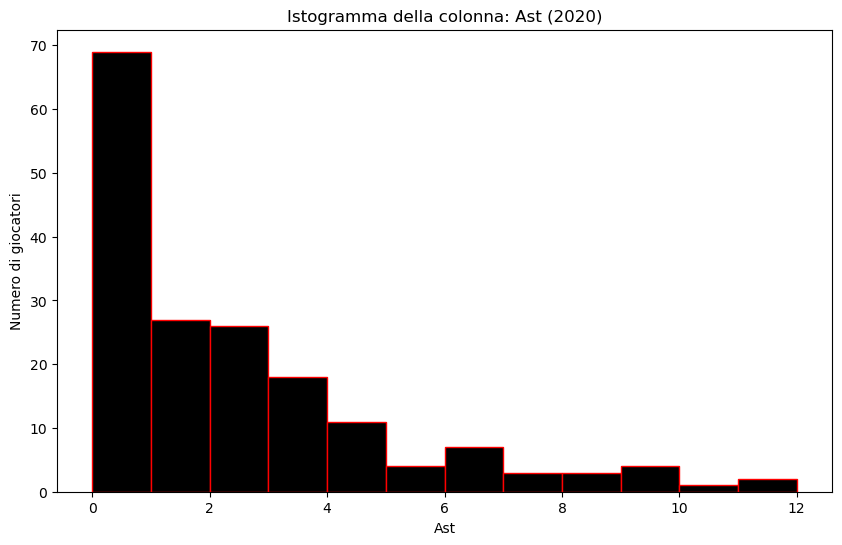

La media di Ast per l'anno 2020 è: 2.02
Il giocatore che ha registrato il maggior numero di Ast è Ruslan Malinovskyi con 12.00.


In [18]:
statistica = 'Ast'
anno = 2020
istogramma(statistica,anno)